**Context**

Sebuah perusahaan penyedia platform online untuk jual beli mobil bekas di UK yang dimana menyediakan wadah untuk mempertemukan pemilik mobil yang ingin menjual mobilnya dengan para calon pembeli potensial di Inggris.Untuk menjual mobilnya para calon penjual mobil diharuskan untuk login pada website, kemudian dapat langsung memasang mobil yang akan dijual dengan mengisi spesifikasi, foto, dan harganya.Harga yang diisi dibebaskan untuk masing-masing penjual mobil, namun dengan kebebasan ini tentunya akan ada banyak penjual terutama yang jarang ataupun baru pertama kali menjual mobil bekasnya kesulitan dalam menentukan harga yang tepat. Faktor terpenting dalam pembelian mobil bekas dimana calon pembeli cukup selektif adalah harga. Sebagaimana berlakunya hukum supply dan demand, jika harga terlalu tinggi dibandingkan harga mobil dengan spesifikasi yang hampir sama tentunya mobil tersebut akan sulit terjual, sebaliknya dengan harga yang terlalu rendah tentunya penjual mobil bekas tidak akan memperoleh profit yang seharusnya atau bahkan dibawah harga pasarnya, maka dari itu penetapan harga yang tepat merupakan hal yang sangat krusial.


**Problem Statement**

Platform yang disediakan perusahaan tentunya diharapkan dapat memudahkan para pemilik mobil untuk menjual mobilnya dengan profit yang diharapkan dan memudahkan pembeli mobil bekas untuk menemukan mobil bekas yang dinginkan dan tentunya dengan harga yang bagus.

Permintaan terhadap mobil bekas terus meningkat di Inggris pada beberapa quartal terakhir pada tahun 2023 Q1 - https://www.smmt.co.uk/2023/05/used-car-sales-q1-2023/ , Q2 - https://www.smmt.co.uk/2023/08/used-car-sales-q2-2023/ , Q3 - https://www.smmt.co.uk/2023/12/used-car-sales-q3-2023-2/ , Q4 - https://www.smmt.co.uk/2024/02/used-car-sales-q4-2023/ . Peningkatan ini disebabkan oleh beragamnya pilihan dan fleksibilitas yang ditawarkan oleh mobil bekas, ditambah dengan harga yang lebih terjangkau dibandingkan mobil baru, menjadikannya daya tarik tersendiri bagi konsumen dengan anggaran yang terbatas. Adanya mobil bekas akan memungkinkan konsumen untuk memilih kendaraan dengan model, ukuran, dan fitur yang diinginkan tanpa harus membayar harga penuh.

Dengan permintaan yang meningkat, tentunya akan semakin banyak juga mobil bekas yang beredar di pasaran. Untuk dapat tetap kompetitif di pasar, tentunya penentuan harga yang tepat merupakan suatu tantangan yang sangat penting yang harus diselesaikan.
Kemudian juga adanya kesulitan bagi penjual mobil bekas untuk menentukan harga mobil yang sesuai dan faktor apa saja yang menentukan harga nya.
* Pertanyaan yang perlu dijawab :
    * Faktor apa saja yang dapat mempengaruhi harga pada mobil bekas ?
    * Apa merek dan jenis mobil dengan harga jual bekas tertinggi dan terendah ?
    * Apakah jenis transmisi yang paling populer?

**Goals**

Berdasarkan permasalahan tersebut, perusahaan ingin memiliki sistem yang nantinya dapat digunakan oleh calon penjual mobil untuk memprediksi harga pasar dari mobilnya berdasarkan spesifikasi mobilnya yang dapat membantu penjual mobil untuk menentukan harga yang sesuai dan kompetitif.
Dengan system ini tentunya perusahaan dapat menyediakan platform yang memberikan harga terbaik bagi calon penjual dan pembeli yang tentunya memberikan pengalaman terbaik bagi kedua pihak.Dengan ini,tentunya akan meningkatkan jumlah pengguna baik calon penjual maupun calon pembeli. Peningkatan pengguna ini tentunya akan memberikan keuntungan bagi perusahaan dimana traffic yang meningkat tentunya jumlah transaksi juga akan cenderung meningkat yang juga akan meningkatkan pendapatan perusahaan dari transaction/commission fee sebesar 1% dari nilai transaksi.Selain itu, sumber pendapatan yang juga akan meningkat diantaranya adalah pendapatan ads yang ditampilkan di dalam platform dengan Cost Per Click yang didapat tergantung pada iklan yang di klik, pendapatan dari additional service seperti iklan prioritas sebesar £10/bulan.


**Analytic Approach**

Karena tujuan kita adalah memprediksi harga, yang perlu dilakukan adalah melakukan analisis data untuk mengetahui faktor apa saja yang mempengaruhi harga jual mobil bekas, kemudian akan dilanjutkan dengan membangun sebuah model regresi yang dapat digunakan sebagai alat untuk membantu penjual mobil bekas pada platform perusahaan untuk memprediksi harga yang dapat membantu dalam menentukan harga jual mobil agar memiliki harga yang kompetitif di pasar.

**Metric**

Evaluasi metrik yang akan digunakan adalah MAE(jika ada outlier pada target),RMSE(jika tidak ada outlier pada target) dan MAPE agar mudah diinterpretasikan, di mana MAE adalah nilai rata-rata absolut dari error.RMSE adalah nilai rata-rata error kuadrat yang setelah itu di akarkan agar lebih mudah untuk dipahami, MAPE adalah rata-rata error yang dihasilkan oleh model dalam bentuk persentase. Kita juga bisa menggunakan Adjusted R-squared sebagai metric pendukung untuk multiple regression karena jika menggunakan R-Squared hasilnya akan cenderung semakin tinggi dengan bertambahnya jumlah variabel independen meskipun pada kenyataannya variabel tersebut tidak meningkatkan performa model secara signifikan, sebaliknya dengan Adjusted R-Squared akan memberikan penalty pada variabel independen yang kurang berpengaruh.Semakin kecil nilai RMSE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. Sebaliknya semakin besar nilai Adjusted R-Squared yang memiliki nilai antara 0-1, maka semakin baik model tersebut.





In [1]:
## Library

import pandas as pd
import numpy as np
import random

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sb
# from sklearn.tree import plot_tree

# Uji Statistika
from scipy.stats import normaltest, chi2_contingency, kruskal

# Preprocessing
import category_encoders as ce # mengandung binary encoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
import missingno


# Split
from sklearn.model_selection import train_test_split

# Model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor


# Accuracy
# from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error, mean_squared_log_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

import warnings
warnings.filterwarnings('ignore')

import os

In [2]:
# Melihat 5 baris utama dari tiap dataset
dataset_folder = 'Dataset/'
dataset_list = [files for files in os.listdir(dataset_folder) if 'cclass' not in files and 'focus' not in files]
for file in dataset_list:
    dataset = pd.read_csv(dataset_folder+file)
    print(file)
    display(dataset.head())

audi.csv


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


bmw.csv


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


ford.csv


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


hyundi.csv


,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


merc.csv


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


skoda.csv


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,150,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,145,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,145,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,150,40.9,1.5


toyota.csv


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


vauxhall.csv


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Corsa,2018,7885,Manual,9876,Petrol,145,55.4,1.4
1,Corsa,2019,11995,Manual,2500,Petrol,145,54.3,1.4
2,Corsa,2017,9777,Automatic,9625,Petrol,145,47.9,1.4
3,Corsa,2016,8500,Manual,25796,Petrol,30,55.4,1.4
4,Corsa,2019,10000,Manual,3887,Petrol,145,43.5,1.4


vw.csv


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


Jika kita lihat di atas, hampir seluruh dataset memiliki kolom fitur yang sama, kecuali pada dataset `hyundi.csv` dimana pada dataset `hyundi.csv` terdapat kolom `tax(£)`.Jika dilihat sepertinya tax(£) dan tax memiliki isi yang sama hanya berbeda nama kolom saja.Sehingga tax(£) akan kita ubah menjadi tax.Dengan kolom fitur yang sama, kolom dapat digabungkan saja menjadi 1 dataset.

In [3]:
read_csv = []
for file in dataset_list:
    if file == 'hyundi.csv':
        hyundi = pd.read_csv(dataset_folder+file)
        hyundi.rename({'tax(£)':'tax'},axis=1,inplace=True)
        hyundi['brand']=file.replace('.csv','')
        read_csv.append(hyundi)
    else:
        df = pd.read_csv(dataset_folder+file)
        df['brand']=file.replace('.csv','')
        read_csv.append(df)
merged_df = pd.concat(read_csv).reset_index(drop=True)

## **Data Understanding & Data Cleaning**

Sumber Data diperoleh dari https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes/data yang berdasarkan sumbernya diperoleh dari hasil scraping listing mobil bekas dengan berbagai jenis model yang berada di UK.Data dibuat pada tahun 2020 dilihat dari update terakhirnya.

Dataset yang kita miliki memiliki 10 kolom, yang mendeskripsikan spesifikasi mobil yang tercantum pada masing-masing listing. yaitu:
* **model**: nama jenis mobil
* **year**: tahun registrasi mobil (bandingkan https://www.autobulbsdirect.co.uk/blog/car-registration-years-chart/)
* **price**: harga jual yang terpampang pada listing (dalam Poundsterling)
* **transmission**: jenis transmisi mobil
* **mileage**: jarak (dalam mil) tempuh penggunaan mobil
* **fuelType**: jenis bahan bakar
* **tax**: pajak kendaraan bermotor tahunan (dalam poundsterling)
* **mpg**: mil yang dapat ditempuh untuk setiap gallon bahan bakar
* **engineSize**: volume mesin (liter)
* **brand**: merek mobil



Berdasarkan sejumlah referensi yang didapat, faktor utama dalam penurunan harga mobil yaitu usia mobil serta mileage yang pernah ditempuh. Menurut https://www.autotrader.ca/editorial/20230408/5-biggest-factors-that-affect-your-car-s-resale-value/, pada umunya mobil yang lebih tua akan bernilai lebih rendah, dan umunya perkembangan mileage berelasi positif dengan usia mobil. Sedangkan menurut https://motorway.co.uk/sell-my-car/guides/car-depreciation-guide, mobil yang berukuran besar akan cnderung bernilai tinggi di awal, namun merosot dengan tajam karena lebih banyak komponen yang memerlukan perawatan. Sebaliknya mobil yang lebih hemat energi akan memiliki demand yang tinggi yang berdampak pada lambatnya laju depresiasi, karena konsumen membutuhkan mobil yang mampu menjelajah lebih jauh dan memiliki beban pajak yang minim. Reputasi brand yang positif dan minim gangguan juga akan menjaga nilai mobil dari depresiasi.

Namun dataset ini mungkin memilki keterbatasan untuk memprediksi harga mobil berbasis listrik, dengan range menjadi pertimbangan ketimbang mileage
Asumsi-asumsi tersebut tentunya akan uji terlebih dahulu dengan dataset yang ada.

In [4]:
print(f'Dataset memiliki {merged_df.shape[0]} baris dan {merged_df.shape[1]} kolom')
merged_df.info()

Dataset memiliki 99187 baris dan 10 kolom
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99187 entries, 0 to 99186
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99187 non-null  object 
 1   year          99187 non-null  int64  
 2   price         99187 non-null  int64  
 3   transmission  99187 non-null  object 
 4   mileage       99187 non-null  int64  
 5   fuelType      99187 non-null  object 
 6   tax           99187 non-null  int64  
 7   mpg           99187 non-null  float64
 8   engineSize    99187 non-null  float64
 9   brand         99187 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.6+ MB


In [5]:
display(merged_df.describe(),merged_df.describe(include='O'))

,year,price,mileage,tax,mpg,engineSize
count,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000
mean,2017.087723,16805.347656,23058.914213,120.299838,55.166825,1.663280
std,2.123934,9866.773417,21148.523721,63.150926,16.138522,0.557646
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7425.000000,125.000000,47.100000,1.200000
50%,2017.000000,14495.000000,17460.000000,145.000000,54.300000,1.600000
75%,2019.000000,20870.000000,32339.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


,model,transmission,fuelType,brand
count,99187,99187,99187,99187
unique,195,4,5,9
top,Fiesta,Manual,Petrol,ford
freq,6557,56445,54928,17965


In [6]:
listData= []
for col in merged_df.columns :
    listData.append( [col, merged_df.dtypes[col], merged_df[col].isna().sum(), merged_df[col].nunique(), merged_df[col].unique()])

tabelDesc = pd.DataFrame(columns=['Nama Kolom', 'Tipe Data','Missing Value','Jumlah Nilai Unik', 'Deskripsi Nilai Unik'],
                     data=listData)
print(merged_df.shape)

pd.options.display.max_colwidth=None


tabelDesc

(99187, 10)


,Nama Kolom,Tipe Data,Missing Value,Jumlah Nilai Unik,Deskripsi Nilai Unik
0,model,object,0,195,"[ A1, A6, A4, A3, Q3, Q5, A5, S4, Q2, A7, TT, Q7, RS6, RS3, A8, Q8, RS4, RS5, R8, SQ5, S8, SQ7, S3, S5, A2, RS7, 5 Series, 6 Series, 1 Series, 7 Series, 2 Series, 4 Series, X3, 3 Series, X5, X4, i3, X1, M4, X2, X6, 8 Series, Z4, X7, M5, i8, M2, M3, M6, Z3, Fiesta, Focus, Puma, Kuga, EcoSport, C-MAX, Mondeo, Ka+, Tourneo Custom, S-MAX, B-MAX, Edge, Tourneo Connect, Grand C-MAX, KA, Galaxy, Mustang, Grand Tourneo Connect, Fusion, Ranger, Streetka, Escort, Transit Tourneo, I20, Tucson, I10, IX35, I30, I40, Ioniq, Kona, Veloster, I800, IX20, Santa Fe, Accent, Terracan, Getz, Amica, SLK, S Class, SL CLASS, G Class, GLE Class, GLA Class, A Class, B Class, GLC Class, C Class, E Class, ...]"
1,year,int64,0,27,"[2017, 2016, 2019, 2015, 2014, 2018, 2013, 2020, 2004, 2009, 2012, 2010, 2007, 2011, 2008, 2003, 2005, 2002, 2006, 1998, 1997, 2001, 2000, 1999, 1996, 2060, 1970]"
2,price,int64,0,13236,"[12500, 16500, 11000, 16800, 17300, 13900, 13250, 11750, 10200, 12000, 16100, 17000, 16400, 15400, 14500, 15700, 19000, 20200, 22500, 17500, 20000, 18500, 19500, 15800, 17200, 14000, 9500, 15000, 16000, 16900, 12300, 10800, 19400, 17100, 11300, 20300, 13200, 15200, 16600, 14400, 23700, 12750, 13000, 15900, 14700, 7000, 10600, 18950, 11700, 11500, 13100, 8300, 19600, 21800, 16200, 18700, 14100, 15600, 10000, 25499, 15500, 25000, 31000, 28000, 21499, 26000, 30000, 10500, 14800, 22000, 17800, 19800, 9800, 12100, 12700, 17400, 21100, 24400, 18750, 13400, 25750, 11200, 12800, 11950, 9400, 13300, 13500, 14300, 19100, 18100, 11400, 11600, 11498, 11698, 18998, 25498, 10498, 9498, 19998, 16798, ...]"
3,transmission,object,0,4,"[Manual, Automatic, Semi-Auto, Other]"
4,mileage,int64,0,42214,"[15735, 36203, 29946, 25952, 1998, 32260, 76788, 75185, 46112, 22451, 28955, 52198, 44915, 21695, 47348, 26156, 28396, 30516, 37652, 34110, 37100, 23714, 21649, 62748, 23789, 17418, 33300, 10793, 25138, 61176, 54754, 21369, 39190, 47482, 40501, 43195, 31447, 34030, 29063, 29545, 75619, 39603, 42908, 83872, 58750, 2029, 22958, 32097, 13057, 20278, 52561, 31604, 32011, 39134, 89483, 56291, 47767, 34315, 66369, 76269, 37840, 26249, 44898, 67161, 17992, 97440, 19268, 51441, 18181, 19494, 32808, 25965, 88215, 5704, 10959, 30201, 19319, 22582, 20052, 16666, 25626, 10460, 43307, 29327, 36714, 28324, 12100, 18001, 28760, 4000, 7897, 24744, 30075, 12577, 24421, 15567, 15207, 14864, 9000, 5000, ...]"
5,fuelType,object,0,5,"[Petrol, Diesel, Hybrid, Other, Electric]"
6,tax,int64,0,48,"[150, 20, 30, 145, 125, 200, 0, 205, 160, 235, 260, 325, 300, 165, 240, 565, 265, 135, 570, 555, 140, 330, 305, 155, 580, 290, 195, 115, 295, 220, 230, 280, 315, 535, 190, 540, 515, 110, 185, 120, 250, 245, 255, 270, 130, 210, 10, 520]"
7,mpg,float64,0,208,"[55.4, 64.2, 67.3, 49.6, 58.9, 61.4, 70.6, 60.1, 57.6, 52.3, 53.3, 56.5, 47.1, 47.9, 62.8, 76.3, 51.4, 65.7, 68.9, 50.4, 72.4, 38.7, 74.3, 42.8, 83.1, 57.7, 54.3, 40.4, 44.1, 33.2, 42.2, 44.8, 48.7, 37.7, 35.8, 40.9, 45.6, 34.0, 29.4, 39.8, 39.2, 41.5, 38.2, 32.1, 30.7, 34.9, 43.5, 36.2, 30.1, 32.8, 29.7, 26.4, 33.6, 34.5, 46.3, 37.2, 80.7, 28.8, 31.7, 32.5, 31.4, 141.3, 31.0, 35.3, 36.7, 117.7, 29.1, 21.4, 19.6, 26.9, 21.1, 76.4, 156.9, 188.3, 24.1, 22.1, 21.6, 23.0, 176.6, 22.8, 22.4, 22.6, 24.8, 21.9, 38.1, 42.1, 50.0, 19.3, 28.5, 21.0, 28.2, 30.4, 43.4, 37.6, 20.3, 30.8, 51.3, 27.4, 33.3, 27.2, ...]"
8,engineSize,float64,0,40,"[1.4, 2.0, 1.0, 3.0, 1.6, 1.8, 1.5, 4.0, 2.5, 1.2, 4.2, 2.9, 5.2, 1.9, 2.7, 0.0, 3.2, 4.1, 6.3, 0.6, 4.4, 2.2, 5.0, 6.6, 2.8, 3.5, 1.1, 2.3, 1.3, 1.7, 2.4, 2.1, 5.5, 6.2, 4.7, 6.0, 3.7, 5.4, 4.3, 4.5]"
9,brand,object,0,9,"[audi, bmw, ford, hyundi, merc, skoda, toyota, vauxhall, vw]"


Sekilas dari tabel di atas kita bisa melihat:
* Kita dapat melihat pada kolom **year** terdapat data anomaly dimana tahun mobil tersebut terdaftar adalah tahun 2060 yang merupakan tahun di masa depan atau belum terjadi.
* Pada kolom **price** harga minimum ada yang mencapai £450, jika dilihat dari website https://www.autotrader.co.uk/cars/cheap/under-500 sepertinya harga tersebut masih masuk akal tergantung kondisi mobil dan untuk harga tertingginya bisa mencapai £159999 https://www.autotrader.co.uk/cars/used/mercedes-benz/g-classmaka berdasarkan referensi tersebut memang mobil bekas mewah dapat mencapai harga tersebut.
* Untuk kolom **mileage** nilai terkecilnya yaitu 1 mungkin saja terjadi apabila mobil masih baru/sangat jarang digunakan.
* Pada kolom **tax** terdapat mobil dengan tax gratis, berdasarkan https://www.gov.uk/vehicle-exempt-from-vehicle-tax mobil di UK dapat dibebaskan dari pajak kendaraan bermotor dengan syarat:
    1. Pengguna mobil tersebut penyandang disabilitas ataupun digunakan untuk mengantarkan penyandang disabilitas
    2. Mobil listrik(hybrid tidak termasuk)
    3. Penggunaan mobil dengan jarak yang dekat(tidak lebih dari 1.5km)
    4. Mobil yang tidak digunakan pada jalan umum(SORN) https://www.gov.uk/make-a-sorn
    5. Kendaraan classic(>=40 tahun dari tahun terkini)
    penjelasan lebih jelasnya https://www.webuyanycar.com/guides/car-ownership/classic-car-tax-exemption/.
    
Dari syarat di atas, perlu diperhatikan untuk syarat ke-1,3,4 pembebasan pajak harus dicabut kembali jika syarat sudah tidak terpenuhi.Cont: mobil bebas pajak yang sebelumnya digunakan oleh penyandang disabilitas jika dijual/digunakan oleh non disabilitas maka pembebasan pajak tidak berlaku lagi.
Berdasarkan https://www.gov.uk/vehicle-tax-rate-tables/print, mobil yang didaftarkan sebelum maret 2001 pajaknya paling kecil adalah £200 tergantung dari engine size nya dalam satuan cc sehingga jika ada mobil yang terdaftar di bawah maret 2001 dengan tax di bawah itu bisa dianggap sebagai anomali.Kemudian untuk mobil yang terdaftar antara maret 2001 dan april 2017, tax rate yang berlaku sesuai dengan tingkat co2 yang dihasilkan dan co2 yang antara 0-100 akan bebas pajak.Dan yang terakhir mobil yang didaftarkan dari april 2017 ke atas mobil akan dikenakan pajak pada tahun pertama pembelian sesuai dengan tipe bahan bakar mobilnya dan tingkat co2 nya. Sejak Maret 2017, syarat ini diperketat untuk untuk mobil hybrid sehingga gratis pajak untuk hybrid hanya berlaku di pembayaran pertama dan hanya untuk mobil dengan emisi 50g/km ke bawah, dan seterusnya membayar minimal 170 pound
* Untuk kolom **mpg** terdapat keanehan dimana mpg yang sangat kecil hingga 0.3 yang sepertinya tidak masuk akal karena berdasar https://www.caranddriver.com/features/g30256394/worst-fuel-economy-cars/ mobil dengan mpg terendah/paling boros yaitu 10 mpg yang biasanya dimiliki mobil dengan kecepatan tinggi.Dan untuk mpg tertinggi yaitu 470.8 berdasarkan https://www.honestjohn.co.uk/realmpg/bmw/i3-2013 memang benar.Untuk mobil electric MPG di sini merupakan MPGe https://www.caranddriver.com/research/a31863350/mpge/ Sebagai perbandingan, fuel economy bila diukur dengan liter/100km biasanya tidak melebihi 10 l/100km https://www.carsguide.com.au/car-advice/what-is-average-fuel-consumption-88469
* Untuk kolom **engineSize** sekilas sepertinya memiliki data minimum yang tidak wajar yaitu 0.Ukuran mesin mobil pada mobil elektrik tidak wajib ada untuk mobil elektrik karena umumnya mobil listrik diukur berdasarkan kilowatt. Sedangkan berdasarkan https://www.carwow.co.uk/guides/choosing/what-engine-size-do-i-need-0521, mobil berbahan bakar minyak (diesel/petrol) memiliki kelas terkecil 1.0 liter ke bawah.
Mesin pada mobil listrik pada umumnya tidak menggunakan mesin pembakaran seperti pada mobil biasa melainkan menggunakan motor listrik yang mengubah energi listrik dari baterai mobil menjadi energi mekanik sehingga diukur dengan kilowatt, maka engine size pada mobil listrik seharusnya adalah 0, mobil yang selain mobil listrik akan selalu memiliki engine size termasuk mobil hybrid karena menggunakan mesin pembakaran dalam dan juga baterai.
    * Listrik - https://afdc.energy.gov/vehicles/how-do-all-electric-cars-work
    * Hybrid - https://afdc.energy.gov/vehicles/how-do-hybrid-electric-cars-work

* Pada kolom fueltype terdapat nilai diskrit yaitu other.Menurut https://www.icompario.com/en-gb/guides/best-fuel-for-your-vehicle/ dan https://www.gov.uk/guidance/advisory-fuel-rates mobil dapat memiliki bahan bakar lain selain petrol diesel dan electric, seperti Liquefied Petrolleum Gas, Biofuels yang termasuk dalam kategori berbeda.Maka untuk Others pada kolom fueltype akan dibiarkan.

* Kolom transmission juga memiliki other dimana mungkin adanya modifikasi yang dilakukan seperti pergantian transmission https://www.crossmembers.com/blogs/articles-and-information/transmission-swap Di sini other juga akan dibiarkan.

### Missing Value

In [7]:
def miss_info(df):
    pct = np.round(df.isna().sum()/df.shape[0]*100,2).sort_values(ascending=False)
    tot = df.isna().sum().sort_values(ascending=False)
    na_df = pd.DataFrame({'Total':tot,'Percent':pct})
    return na_df

miss_info(df)

,Total,Percent
model,0,0.0
year,0,0.0
price,0,0.0
transmission,0,0.0
mileage,0,0.0
fuelType,0,0.0
tax,0,0.0
mpg,0,0.0
engineSize,0,0.0
brand,0,0.0


* Dataset kita tidak memiliki missing value.

### Outlier

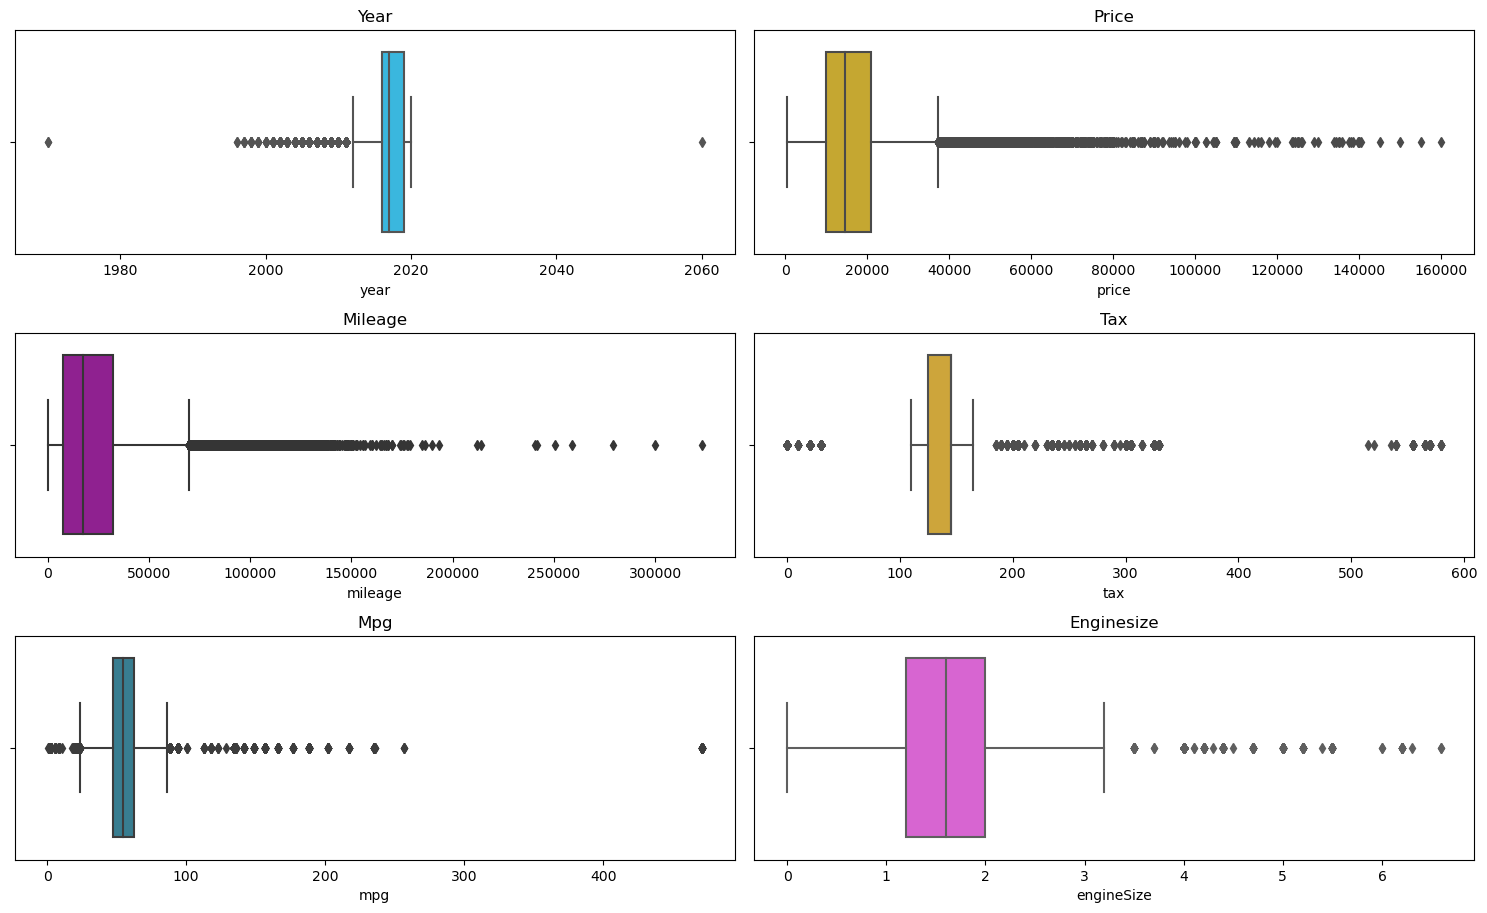

In [8]:
# Membuat boxplot untuk melihat outliers
columns_for_boxplot=[col for col in merged_df.columns if merged_df[col].dtypes!='object']

# Mengambil warna secara acak
colors = ['#'+''.join(random.choices('0123456789ABCDEF', k=6)) for _ in range(len(columns_for_boxplot))]

num_cols = 2
num_rows = 10
total_plots = num_cols * num_rows
num_plots = min(len(columns_for_boxplot), total_plots)

plt.figure(figsize=(15, 30))

for i in range(num_plots):
    plt.subplot(num_rows, num_cols, i+1)
    sb.boxplot(data=merged_df,x=columns_for_boxplot[i],color=colors[i])
    plt.title(columns_for_boxplot[i].capitalize())

plt.tight_layout()
plt.show()

* Dari boxplot di atas kita bisa melihat semua kolom numerikal memiliki outlier.
* Untuk outlier akan diatasi dengan robust scaler,namun kita akan cek terlebih dahulu apakah outlier tersebut merupakan data sebenarnya atau tidak.

In [9]:
def show_outlier(col_name,table=True):
    Q1 = merged_df[col_name].quantile(0.25)
    Q3 = merged_df[col_name].quantile(0.75)
    IQR = Q3-Q1
    outlier_df = merged_df[(merged_df[col_name]<(Q1-1.5*IQR))|(merged_df[col_name]>(Q3+1.5*IQR))]
    if table==False:
        print(f'Kolom {col_name} memiliki {outlier_df.shape[0]} baris data outlier yang merupakan {round(outlier_df.shape[0]/merged_df.shape[0]*100,2)}% dari keseluruhan data')
    print(f'Data dianggap sebagai outlier apabila nilainya kurang dari {Q1-1.5*IQR} atau lebih dari {Q3+1.5*IQR} \n')
    if True:
        return outlier_df


In [10]:
for col in [col for col in merged_df.columns if merged_df[col].dtypes!='object']:
    show_outlier(col,table=False)

Kolom year memiliki 1737 baris data outlier yang merupakan 1.75% dari keseluruhan data
Data dianggap sebagai outlier apabila nilainya kurang dari 2011.5 atau lebih dari 2023.5 

Kolom price memiliki 3669 baris data outlier yang merupakan 3.7% dari keseluruhan data
Data dianggap sebagai outlier apabila nilainya kurang dari -6307.5 atau lebih dari 37176.5 

Kolom mileage memiliki 3902 baris data outlier yang merupakan 3.93% dari keseluruhan data
Data dianggap sebagai outlier apabila nilainya kurang dari -29946.0 atau lebih dari 69710.0 

Kolom tax memiliki 28815 baris data outlier yang merupakan 29.05% dari keseluruhan data
Data dianggap sebagai outlier apabila nilainya kurang dari 95.0 atau lebih dari 175.0 

Kolom mpg memiliki 939 baris data outlier yang merupakan 0.95% dari keseluruhan data
Data dianggap sebagai outlier apabila nilainya kurang dari 23.550000000000008 atau lebih dari 86.35 

Kolom engineSize memiliki 650 baris data outlier yang merupakan 0.66% dari keseluruhan data
Dat

#### Year (Outlier)

In [11]:
show_outlier('year').sample(5,random_state=42)

Data dianggap sebagai outlier apabila nilainya kurang dari 2011.5 atau lebih dari 2023.5 



,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
37215,Fiesta,2011,4489,Manual,67145,Petrol,125,50.4,1.2,ford
83675,Insignia,2010,5350,Manual,44500,Diesel,155,52.3,2.0,vauxhall
55872,SLK,2006,4995,Automatic,75000,Petrol,555,28.0,3.5,merc
56203,C Class,2011,9495,Automatic,39000,Petrol,160,43.5,1.8,merc
38819,Fusion,2008,2750,Automatic,66000,Petrol,260,37.2,1.6,ford


* Setelah dilakukan pengecekan secara manual pada beberapa sample di atas, jika dilihat dari tahun release tiap jenis mobil pada sample, tahun tersebut mungkin memang valid karena memiliki tahun di atas tahun releasenya.Namun hal ini tidak sepenuhnya menutup kemungkinan adanya kesalahan input pengguna.
    * Ford KA - https://en.wikipedia.org/wiki/Ford_Ka (first release 1996)
    * Audi A4 - https://en.wikipedia.org/wiki/Audi_A4 (first release 1994)
    * C-Max - https://en.wikipedia.org/wiki/Ford_C-Max. (first release 2003)
    * Astra - https://en.wikipedia.org/wiki/Vauxhall_Astra. (first release 1980)
    * Meriva - https://en.wikipedia.org/wiki/Opel_Meriva. (first release 2003)

* Pada tabel di bawah kami juga mengecek pada data dengan year yang terbilang lebih extreme.

In [12]:
merged_df[(merged_df['year']<=1990)|(merged_df['year']>2020)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
39175,Fiesta,2060,6495,Automatic,54807,Petrol,205,42.8,1.4,ford
56346,M Class,1970,24999,Automatic,14000,Diesel,305,39.2,0.0,merc
81235,Zafira,1970,10495,Manual,37357,Petrol,200,42.2,1.4,vauxhall


* Mercedes M Class pertama rilis pada 1997 dan Vauxhall Zafira pertamakali rilis pada 1999, sementara Ford Fiesta terakhir diproduksi pada 2023. Dengan data yang tidak konsisten dengan realita, kita bisa menghapus baris ini karena tidak berpengaruh signifikan dibandingkan keseluruhan dataset.
    * Fiesta - https://en.wikipedia.org/wiki/Ford_Fiesta
    * M Class - https://en.wikipedia.org/wiki/Mercedes-Benz_GLE#:~:text=9%20February%201997.-,Initial%20release,row%2C%20seven%2Dseat%20version.
    * Zafira - https://en.wikipedia.org/wiki/Opel_Zafira#:~:text=Zafira%20A%20(1999),-Zafira%20A%20(T98&text=The%20first%20generation%20Zafira%20was,in%20April%20of%20that%20year.)

In [13]:
merged_df.drop([39175,56346,81235],inplace=True)

#### Price (Outlier)

In [14]:
show_outlier('price')

Data dianggap sebagai outlier apabila nilainya kurang dari -6307.5 atau lebih dari 37176.5 



,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
198,Q7,2020,62985,Semi-Auto,10,Diesel,145,33.2,3.0,audi
199,RS6,2016,44985,Semi-Auto,49050,Petrol,325,29.4,4.0,audi
203,A7,2019,39985,Automatic,5201,Diesel,145,38.7,3.0,audi
205,A6,2019,45485,Automatic,3241,Diesel,145,39.2,3.0,audi
219,Q5,2019,37985,Automatic,6024,Diesel,145,38.2,2.0,audi
...,...,...,...,...,...,...,...,...,...,...
99153,California,2019,57991,Automatic,10288,Diesel,260,33.2,2.0,vw
99154,California,2019,57991,Automatic,6739,Diesel,260,33.2,2.0,vw
99155,California,2019,57991,Automatic,7259,Diesel,260,33.2,2.0,vw
99156,California,2019,57991,Automatic,7486,Diesel,260,33.2,2.0,vw


* Untuk outliers pada kolom price tidak dapat dilakukan pengecekan lebih lanjut karena harga memang ditentukan oleh penjualnya secara bebas sehingga tidak terdapat batasan. Meski demikian yang pasti adalah harga tidak dibawah 0 dan harga minimum seperti yang sebelumnya telah kita lihat, masih merupakan harga yang wajar di pasaran dan harga maximum juga masih ditemukan di pasar.
* Untuk kolom price outliers akan dibiarkan.

#### Mileage (Outlier)

In [15]:
show_outlier('mileage')

Data dianggap sebagai outlier apabila nilainya kurang dari -29945.875 atau lebih dari 69707.125 



,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
6,A6,2016,13250,Automatic,76788,Diesel,30,61.4,2.0,audi
7,A4,2016,11750,Manual,75185,Diesel,20,70.6,2.0,audi
40,A3,2015,11300,Manual,75619,Diesel,20,68.9,2.0,audi
43,A5,2014,13200,Automatic,83872,Diesel,125,58.9,2.0,audi
54,Q5,2015,14700,Automatic,89483,Diesel,205,47.1,2.0,audi
...,...,...,...,...,...,...,...,...,...,...
99182,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,vw
99183,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,vw
99184,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,vw
99185,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,vw


* Outliers pada kolom mileage juga masih tergolong normal selama tidak kurang dari 0 dan kembali lagi pada seringnya pemakaian .

#### Tax (Outlier)

In [16]:
show_outlier('tax')

Data dianggap sebagai outlier apabila nilainya kurang dari 95.0 atau lebih dari 175.0 



,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
5,A1,2016,13900,Automatic,32260,Petrol,30,58.9,1.4,audi
6,A6,2016,13250,Automatic,76788,Diesel,30,61.4,2.0,audi
7,A4,2016,11750,Manual,75185,Diesel,20,70.6,2.0,audi
...,...,...,...,...,...,...,...,...,...,...
99176,Eos,2011,7195,Manual,43000,Petrol,185,41.5,1.4,vw
99177,Eos,2008,4995,Manual,65000,Diesel,195,48.0,2.0,vw
99178,Eos,2008,3695,Automatic,127000,Petrol,280,34.5,2.0,vw
99181,Eos,2006,2995,Manual,92640,Diesel,200,48.0,2.0,vw


* Sebelumnya kita sudah melihat bahwa outlier pada kolom tax tergolong cukup besar yaitu 29% dari keseluruhan data.
* Untuk outlier pada tax seperti penjelasan dan referensi sebelumnya, tax terkecil bisa mencapai 0/free.Dan syarat tax free yang masih dapat berlaku setelah mobil berpindah tangan hanya mobil listrik, mobil hybrid keluaran sebelum 2017 atau kendaraan classic(>=40 tahun dari tahun terkini).Rate dari tax juga di pengaruhi oleh emission CO2.
* Kami memutuskan untuk mendrop kolom tax karena kurangnya data mengenai co2 emission dan tiap jenis model mobil memiliki subtype lagi dengan emisi co2 yang berbeda-beda, sehingga tidak ditemukan cara tepat untuk mengecek validitas data emisi per jenis dan spesifikasi mobil. Sebagai contoh, https://drive.google.com/file/d/1GTtawJxSW0MZwGkefqa4QGBKf3HfPjQm/view?usp=sharing yang bisa diakses melalui https://carfueldata.vehicle-certification-agency.gov.uk/search-new-or-used-cars.aspx (website resmi pemerintah UK) menunjukkan bahwa setiap jenis mobil bisa memiliki beberapa sub-type dengan enginesize, gearbox/transmisi, dan fueltype yang sama tapi memiliki emisi co2 yang berbeda.Sehingga untuk mengecek validitas outlier pada tax diperlukan info mengenai subtype tersebut.


In [17]:
merged_df=merged_df.drop(columns='tax')

#### Engine Size (Outlier)

In [18]:
enginesize_0 = merged_df[(merged_df['engineSize']==0.0)&(merged_df['fuelType']!='Electric')]
print(f'Proporsi data dengan enginsize 0 adalah {round(len(enginesize_0)/len(merged_df)*100,2)}% dari keseluruhan data')
enginesize_0

Proporsi data dengan enginsize 0 adalah 0.27% dari keseluruhan data


,model,year,price,transmission,mileage,fuelType,mpg,engineSize,brand
7505,Q5,2019,44790,Automatic,5886,Petrol,117.7,0.0,audi
7506,Q3,2019,32788,Automatic,1500,Diesel,47.1,0.0,audi
7516,Q3,2020,29944,Manual,1500,Petrol,40.9,0.0,audi
7517,Q3,2020,33333,Automatic,1500,Diesel,47.1,0.0,audi
7518,Q3,2020,29944,Automatic,1500,Petrol,32.5,0.0,audi
...,...,...,...,...,...,...,...,...,...
95678,Tiguan,2016,15300,Manual,38398,Diesel,53.3,0.0,vw
95685,Tiguan,2018,24000,Automatic,22200,Diesel,47.9,0.0,vw
96851,Up,2017,8500,Manual,20324,Petrol,64.2,0.0,vw
96909,Up,2017,8000,Manual,24444,Petrol,60.1,0.0,vw


* Terlihat ada 270 mobil berbahan bakar petrol/diesel juga tercantum memiliki ukuran mesin 0.0.
* Berdasarkan klarifikasi pembuat dataset https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes/discussion/209170#:~:text=The%20cars%20with%20engine%20size%200%20are%20in%20fact%20electric%20cars. menyatakan bahwa listing dengan engine size 0 sebenarnya adalah mobil electric.Namun kita tidak dapat percaya begitu saja, karena data ini bukan diisi oleh pembuat dataset.Maka akan kita cek terlebih dahulu pada website pemerintah UK.
    * Q5 - https://drive.google.com/file/d/1RciWA6gbnSG29C66yn90u6xU7AnhNcJi/view?usp=sharing
    * Q3 - https://drive.google.com/file/d/1CYMSEHMeyWb7YcONgMudi64nMwQphraL/view?usp=sharing (page1),https://drive.google.com/file/d/1O-6PaQWK55saQq8stlQrW2hXE9rELKsA/view?usp=sharing (page2)
* Dari hasil pengecekan ternyata kedua model tersebut sama sekali tidak memiliki subtype dengan engine size 0 dan fuel type yang digunakan memang benar yaitu petrol atau diesel, karena tidak memungkinkan untuk dicek satu per satu maka engine size 0 akan diimputasi.
    
* Data engineSize bernilai 0 telah dianggap anomali untuk fuelType bukan Electric, sehingga kita lakukan imputasi berdasarkan jenis mobil terdekat yang merek, model, transmisi, dan bahan bakarnya sama. Kita akan lihat terlebih dahulu apakah ada perbedaan signifikan antara tiap jenis merek,model,transmisi, dan fueltypenya terhadap engine size.

In [19]:
for col in [col for col in merged_df.columns if merged_df[col].dtypes!='object']:
    stat,pval=normaltest(merged_df[col])
    if pval<=0.05:
        print(f'Kolom {col} tidak berdistribusi normal')
    else:
        print(f'Kolom {col} berdistribusi normal')

Kolom year tidak berdistribusi normal
Kolom price tidak berdistribusi normal
Kolom mileage tidak berdistribusi normal
Kolom mpg tidak berdistribusi normal
Kolom engineSize tidak berdistribusi normal


* Seluruh kolom numerikal tidak berdistribusi normal, sehingga untuk imputasi akan digunakan median.

In [20]:
def kruskal_test(col_test):
    for col in [col for col in merged_df.columns if merged_df[col].dtypes=='object']:
        group=[merged_df[(merged_df[col] == i)][col_test].values for i in merged_df[col].unique()]
        stat,pvalue=kruskal(*group)
        if pvalue<=0.05:
            print(f'Menolak H0. untuk setiap value {col} unik terdapat perbedaan {col_test} signifikan ')
        else:
            print(f'Gagal Menolak H0. Tidak terbukti untuk setiap value {col} unik terdapat perbedaan {col_test} signifikan')

kruskal_test('engineSize')

Menolak H0. untuk setiap value model unik terdapat perbedaan engineSize signifikan 
Menolak H0. untuk setiap value transmission unik terdapat perbedaan engineSize signifikan 
Menolak H0. untuk setiap value fuelType unik terdapat perbedaan engineSize signifikan 
Menolak H0. untuk setiap value brand unik terdapat perbedaan engineSize signifikan 


* Dari kriteria yang akan digunakan untuk filter, ternyata memang semua kriteria memiliki perbedaan signifikan untuk engine sizenya pada tiap jenisnya.Sehingga akan lebih valid dan spesifik kita gunakan filter tersebut untuk mengambil mediannya. Disini median yang kita ambil hanya data yang memiliki engine size > 0.

In [21]:
def anomaly_impute_engine(df):
    median_value = merged_df[(merged_df['model']==df['model'])&(merged_df['transmission']==df['transmission'])&
                  (merged_df['fuelType']==df['fuelType'])&(merged_df['engineSize']>0)]['engineSize'].median()
    if np.isnan(median_value):
      median_value = merged_df[(merged_df['model']==df['model'])&(merged_df['engineSize']>0)]['engineSize'].median()
      return median_value
    else:
      return median_value

In [22]:
merged_df.loc[enginesize_0.index,'engineSize']=enginesize_0.apply(anomaly_impute_engine,axis=1)

In [23]:
enginesize_0_sisa = merged_df[np.isnan(merged_df['engineSize'])]
enginesize_0_sisa

,model,year,price,transmission,mileage,fuelType,mpg,engineSize,brand
55621,230,2007,4500,Automatic,94000,Petrol,29.4,NaN,merc


* Masih tersisa 1, ini berarti pada dataset kita hanya terdapat 1 datapoint untuk model ini.Maka akan kita drop saja, karena tidak akan terlalu berdampak juga pada model.

In [24]:
merged_df.drop(55621,inplace=True)

In [25]:
merged_df.reset_index(inplace=True,drop=True)

* Pengecekan anomaly dilakukan dengan melihat apakah outlier tersebut merupakan satu-satunya pada model yang sama.Jika iya, maka data point tersebut berpotensi merupakan anomaly

In [26]:
def anomaly_check(col):
    anomaly_index=[]
    df = show_outlier(col)
    for i in df.index:
        if ((merged_df['model']==df.loc[i,'model'])&(merged_df[col]==df.loc[i,col])).sum()==1:
            anomaly_index.append(i)
    return df.loc[anomaly_index]

In [27]:
anomaly_check('engineSize')

Data dianggap sebagai outlier apabila nilainya kurang dari -2.220446049250313e-16 atau lebih dari 3.2 



,model,year,price,transmission,mileage,fuelType,mpg,engineSize,brand
8941,A6,2004,8995,Automatic,100730,Petrol,19.3,4.2,audi
9879,A4,2006,7995,Automatic,74000,Petrol,22.8,4.2,audi
10150,A6,2006,8750,Automatic,98000,Petrol,21.1,5.2,audi
10187,RS7,2014,33490,Automatic,56000,Petrol,28.8,4.0,audi
10455,A8,2015,32000,Automatic,30306,Petrol,25.0,6.3,audi
19897,M6,2006,12495,Semi-Auto,89000,Petrol,19.1,5.0,bmw
20524,5 Series,2002,6990,Automatic,78316,Petrol,23.7,3.5,bmw
39271,Mondeo,2017,15499,Automatic,10162,Petrol,38.2,5.0,ford
44278,SL CLASS,2011,149948,Automatic,3000,Petrol,21.4,6.2,merc
46614,CL Class,2014,19980,Semi-Auto,55206,Petrol,29.4,4.7,merc


* Engine Size tertinggi dari data yang mungkin anomaly di atas adalah 6.2.Akan kita cek pada slah satu model.
* Berdasar https://www.auto123.com/en/new-cars/technical-specs/mercedes/s-class/2010/base/s63-amg/#:~:text=Engine-,6.2L,-V8%20DOHC%2032 ternyata memang S Class memiliki engine size 6.2, maka untuk nilai di bawah ini masih wajar.Sehingga akan kita biarkan.

#### MPG (Outlier)

In [28]:
show_outlier('mpg')

Data dianggap sebagai outlier apabila nilainya kurang dari 23.550000000000008 atau lebih dari 86.35 



,model,year,price,transmission,mileage,fuelType,mpg,engineSize,brand
864,A3,2020,31990,Semi-Auto,2165,Hybrid,141.3,1.4,audi
1104,Q5,2019,44990,Automatic,6565,Hybrid,117.7,2.0,audi
1646,R8,2019,129000,Semi-Auto,4000,Petrol,21.4,5.2,audi
1648,Q5,2020,46450,Semi-Auto,3500,Hybrid,117.7,2.0,audi
1869,R8,2013,47995,Manual,19834,Petrol,19.6,4.2,audi
...,...,...,...,...,...,...,...,...,...
90238,Passat,2017,25500,Semi-Auto,22400,Hybrid,166.0,1.4,vw
90339,Passat,2018,25999,Automatic,32656,Hybrid,166.0,1.4,vw
90376,Passat,2018,25000,Automatic,8848,Hybrid,166.0,1.4,vw
90470,Passat,2018,20500,Automatic,38899,Hybrid,166.0,1.4,vw


In [29]:
mpg_10 = merged_df[(merged_df['mpg']<=10)]
print(f'Proporsi data dengan mpg di bawah 10 adalah {round(len(mpg_10)/len(merged_df)*100,2)}% dari keseluruhan data')
mpg_10.sample(10,random_state=2)

Proporsi data dengan mpg di bawah 10 adalah 0.03% dari keseluruhan data


,model,year,price,transmission,mileage,fuelType,mpg,engineSize,brand
20782,3 Series,2020,43880,Automatic,5980,Hybrid,8.8,2.0,bmw
39623,Ioniq,2019,22998,Automatic,2844,Hybrid,1.1,1.6,hyundi
70220,Hilux,2020,23495,Manual,100,Diesel,2.8,2.4,toyota
17157,3 Series,2019,35995,Semi-Auto,2166,Hybrid,8.8,2.0,bmw
70233,Hilux,2019,20500,Manual,5190,Diesel,2.8,2.4,toyota
70253,Hilux,2020,30500,Automatic,5000,Diesel,2.8,2.4,toyota
11905,X3,2020,52910,Semi-Auto,101,Hybrid,5.5,2.0,bmw
46833,A Class,2020,30231,Semi-Auto,4000,Hybrid,1.1,1.3,merc
20495,3 Series,2020,37000,Automatic,4691,Hybrid,8.8,2.0,bmw
12784,X3,2020,54990,Semi-Auto,2137,Hybrid,5.5,2.0,bmw


Dari tabel listing di atas, sebagian besar data listing dengan MPG kurang dari 0 bukan mobil listrik, namun Diesel maupun Hybrid. Saat dibandingkan dengan data real, yaitu untuk Hyundai IONIQ https://www.car.info/en-se/hyundai/ioniq/ioniq-16-89-kwh-dct6-2019-18118366/specs dan BMW 3 Series 2019 https://www.guideautoweb.com/en/makes/bmw/3-series/2019/specifications/330i-xdrive-touring/, keduanya memiliki nilai efisiensi bahan bakar dalam liter/100km mendekati yang tertera pada dataset. Dapat disimpulkan bahwa efisiensi bahan bakar di bawah 10 mpg diduga salah input dari satuan liter/100 km, sehingga dapat kita lakukan konversi untuk mendapatkan nilai MPG sesungguhnya.
Konversi liter/100km ke mpg UK: https://www.inchcalculator.com/convert/liter-per-hundred-kilometers-to-mile-per-gallon-uk/

In [30]:
conversion_factor = 282.481

def convert_mpg(mpg_value):
    if mpg_value < 10:
        return  conversion_factor/mpg_value
    else:
        return mpg_value


In [31]:
mpg_10['mpg']=mpg_10['mpg'].apply(convert_mpg)
mpg_10.sample(5)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize,brand
13806,3 Series,2019,35230,Semi-Auto,4602,Hybrid,32.100114,2.0,bmw
11905,X3,2020,52910,Semi-Auto,101,Hybrid,51.360182,2.0,bmw
46797,A Class,2020,30231,Semi-Auto,4000,Hybrid,256.800909,1.3,merc
17633,X3,2020,52991,Semi-Auto,4360,Hybrid,51.360182,2.0,bmw
16866,X3,2020,53995,Semi-Auto,2000,Hybrid,51.360182,2.0,bmw


* Setelah dikonversikan ke mpg, perlu dicek lagi apakah hasil konversi tersebut sudah termasuk dalam rentang nilai mpg pada model tersebut.

In [32]:
def anomaly_check_mpg(col,df):
    anomaly_index=[]
    for i in df.index:
        q_1=merged_df[(merged_df['model']==df.loc[i,'model'])][col].quantile(0.25)
        q_3=merged_df[(merged_df['model']==df.loc[i,'model'])][col].quantile(0.75)
        iqr = q_3-q_1
        if df.loc[i,col]<(q_1-1.5*iqr) or df.loc[i,col]>(q_3+1.5*iqr):
            anomaly_index.append(i)
    return df.loc[anomaly_index]

In [33]:
anomaly_check_mpg('mpg',mpg_10).sample(5)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize,brand
70209,Hilux,2019,28495,Automatic,3350,Diesel,100.886071,2.4,toyota
51243,A Class,2020,31500,Semi-Auto,1000,Hybrid,256.800909,1.3,merc
98530,Golf SV,2019,17950,Manual,100,Petrol,941.603333,1.0,vw
54639,A Class,2020,33900,Automatic,345,Hybrid,256.800909,1.3,merc
70220,Hilux,2020,23495,Manual,100,Diesel,100.886071,2.4,toyota


* Ternyata dari mpg di bawah 10 tidak semuanya dalam satuan l/100km sehingga hasil kalkulasi jauh dari rentang nilai mpg model tersebut, nilai ini kami hitung dengan menghitung upper fence dan lower fence nya seperti deteksi outlier pada umumnya tapi kali ini sesuai modelnya.
* Maka untuk masalah ini kami akan mengisi mpg tersebut dengan median seperti pada engine size.

In [34]:
kruskal_test('mpg')

Menolak H0. untuk setiap value model unik terdapat perbedaan mpg signifikan 
Menolak H0. untuk setiap value transmission unik terdapat perbedaan mpg signifikan 
Menolak H0. untuk setiap value fuelType unik terdapat perbedaan mpg signifikan 
Menolak H0. untuk setiap value brand unik terdapat perbedaan mpg signifikan 


In [35]:
def anomaly_impute_mpg(df):
    median_value = merged_df[(merged_df['model']==df['model'])&(merged_df['transmission']==df['transmission'])&
                  (merged_df['fuelType']==df['fuelType'])&(merged_df['mpg']>10)]['mpg'].median()
    if np.isnan(median_value):
      median_value = merged_df[(merged_df['model']==df['model'])&(merged_df['mpg']>10)]['mpg'].median()
      return median_value
    else:
      return median_value

In [36]:
mpg_10.loc[anomaly_check_mpg('mpg',mpg_10).index,'mpg'] = anomaly_check_mpg('mpg',mpg_10).apply(anomaly_impute_mpg,axis=1)

In [37]:
merged_df.loc[mpg_10.index,'mpg'] = mpg_10['mpg']

* Untuk outlier sisanya masih termasuk dalam mpg yang wajar, bahkan untuk nilai max mpgnya yaitu mobil i3 dengan mpg 470.8 memang benar ada https://www.honestjohn.co.uk/realmpg/bmw/i3-2013/i3-range-extender maka sisa outliernya akan dibiarkan saja.

#### Transmission (Other)

In [38]:
merged_df['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [39]:
def check_value_percentage(col,value):
    len_value=len(merged_df[merged_df[col]==value])
    len_total=len(merged_df)
    print(f'Terdapat {len_value*100/len_total}% value kolom {col} yang bernilai {value}',)
    return merged_df[merged_df[col]==value]

def check_model_value(col,value):
    return merged_df[merged_df[col]==value]['model'].unique()

In [40]:
check_value_percentage('transmission','Other')


Terdapat 0.009074135688575662% value kolom transmission yang bernilai Other


,model,year,price,transmission,mileage,fuelType,mpg,engineSize,brand
44152,Ioniq,2017,12495,Other,27779,Hybrid,78.5,1.6,hyundi
44174,Tucson,2017,16995,Other,25915,Petrol,39.8,1.6,hyundi
53923,GLA Class,2016,18700,Other,30895,Other,56.5,2.1,merc
57033,SLK,2015,12995,Other,39000,Diesel,56.5,2.1,merc
63516,Scala,2019,15999,Other,3500,Petrol,47.1,1.0,skoda
66115,Yaris,2015,12795,Other,16733,Hybrid,78.0,1.5,toyota
77099,Mokka,2019,19995,Other,1450,Diesel,57.7,1.5,vauxhall
77714,Mokka,2019,13499,Other,3000,Petrol,44.8,1.4,vauxhall
77817,Mokka,2019,22499,Other,4500,Petrol,42.2,1.5,vauxhall


In [41]:
check_model_value('transmission','Other')

array([' Ioniq', ' Tucson', ' GLA Class', ' SLK', ' Scala', ' Yaris',
       ' Mokka'], dtype=object)

In [42]:
merged_df=merged_df.drop(merged_df[merged_df['transmission']=='Other'].index)

#### FuelType (Other)

In [43]:
merged_df['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Other', 'Electric'], dtype=object)

In [44]:
check_value_percentage('fuelType','Other')


Terdapat 0.248048883780023% value kolom fuelType yang bernilai Other


,model,year,price,transmission,mileage,fuelType,mpg,engineSize,brand
10684,3 Series,2017,14250,Automatic,55594,Other,148.7,2.0,bmw
10700,i3,2016,17100,Automatic,25269,Other,470.8,0.6,bmw
10703,2 Series,2017,13000,Automatic,61818,Other,141.2,1.5,bmw
10754,2 Series,2017,16000,Automatic,32389,Other,141.2,1.5,bmw
10786,X5,2016,21000,Automatic,71626,Other,85.6,2.0,bmw
...,...,...,...,...,...,...,...,...,...
97880,Touareg,2015,19995,Automatic,59115,Other,42.8,3.0,vw
98124,Arteon,2019,24989,Automatic,1413,Other,50.4,2.0,vw
98128,Arteon,2019,27495,Automatic,3500,Other,47.1,2.0,vw
98462,Touran,2019,25990,Automatic,4305,Other,38.7,1.5,vw


In [45]:
check_model_value('fuelType','Other')

array([' 3 Series', ' i3', ' 2 Series', ' X5', ' 5 Series', ' i8',
       ' Mondeo', ' Ioniq', ' GLE Class', ' C Class', ' Kamiq', ' Fabia',
       ' Yeti', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Verso', ' Supra', ' Viva', ' T-Roc', ' Golf',
       ' Passat', ' T-Cross', ' Polo', ' Tiguan', ' Sharan', ' Up',
       ' Touareg', ' Arteon', ' Touran'], dtype=object)

In [46]:
merged_df=merged_df.drop(merged_df[merged_df['fuelType']=='Other'].index)

### Duplicate Data

In [47]:
duplicate_df = merged_df[merged_df.duplicated()]
duplicate_df.head(5)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize,brand
273,Q3,2019,34485,Automatic,10,Diesel,47.1,2.0,audi
764,Q2,2019,22495,Manual,1000,Diesel,49.6,1.6,audi
784,Q3,2015,13995,Manual,35446,Diesel,54.3,2.0,audi
967,Q5,2019,31998,Semi-Auto,100,Petrol,33.2,2.0,audi
990,Q2,2019,22495,Manual,1000,Diesel,49.6,1.6,audi


In [48]:
print(f'Jumlah data yang duplikat ada {duplicate_df.shape[0]} baris')

Jumlah data yang duplikat ada 1602 baris


* Dilihat dari kolomnya, hampir tidak mungkin memiliki kesamaan pada tiap kolomnya terutama pada mileage dan pricenya.Karena tidak ada cara yang akurat untuk pengecekan duplikat ini maka untuk data point yang sama persis pada tiap kolomnya akan kita drop saja karena akan menjadi redundant nantinya dan mempengaruhi performa model.

In [49]:
merged_df.drop_duplicates(inplace=True)


d:\Work\Purwadhika\Final\used_car_process.csv

## **Data Analysis**

#### Price (Target)

In [50]:
def norm_test(col):
    stat,p_val = normaltest(merged_df[col])
    if p_val<=0.05:
        print(f'Kolom {col} memiliki distribusi tidak normal')
    else:
        print(f'Kolom {col} memiliki distribusi normal')

* Kita cek terlebih dahulu distribusi dari target variabel kita yaitu price.

<Axes: xlabel='price', ylabel='Density'>

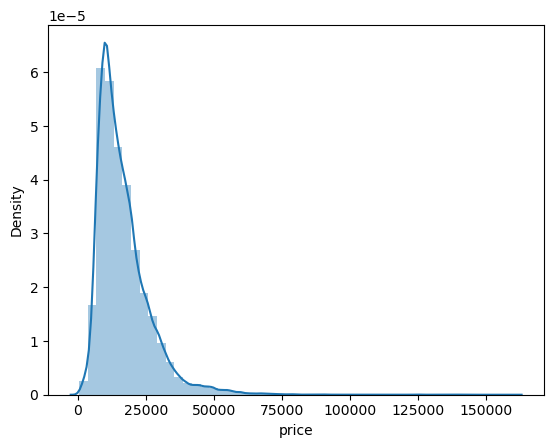

In [51]:
sb.distplot(merged_df['price'])

* Kita bisa melihat distribusi pada kolom price menunjukkan ciri-ciri dari right-skewed distribution dimana mayoritas data terkumpul pada sisi kiri, ini berarti mean atau rata-rata pada kolom price lebih besar dari mediannya.
* Agar lebih pasti kita perlu melakukan uji normalitas terlebih dahulu.

In [52]:
norm_test('price')

Kolom price memiliki distribusi tidak normal


* Dapat dipastikan kolom price memiliki distribusi tidak normal
* Karena price memiliki distribusi tidak normal, maka estimator yang nanti dipakai pada visualisasi adalah median yang lebih mewakili data dibandingkan mean.
* Evaluasi terhadap model nantinya akan menggunakan MeanAE dan R2 ketimbang MAE, karena MAE menggunakan mean.

#### Year

In [53]:
merged_df['year'].value_counts()

year
2019    26041
2017    21511
2016    15679
2018    13536
2015     7564
2014     4048
2020     3999
2013     2588
2012      632
2011      430
2010      340
2009      277
2008      198
2007      162
2006       86
2005       69
2004       52
2003       34
2002       31
2001       20
2000        9
1998        8
1999        6
1997        4
1996        2
Name: count, dtype: int64

* Kebanyakan mobil bekas berasal dari tahun 2015 ke atas, dan untuk mobil yang di bawah tahun 2010 masih tergolong sedikit terutama mobil klasik (bawah tahun 2000)

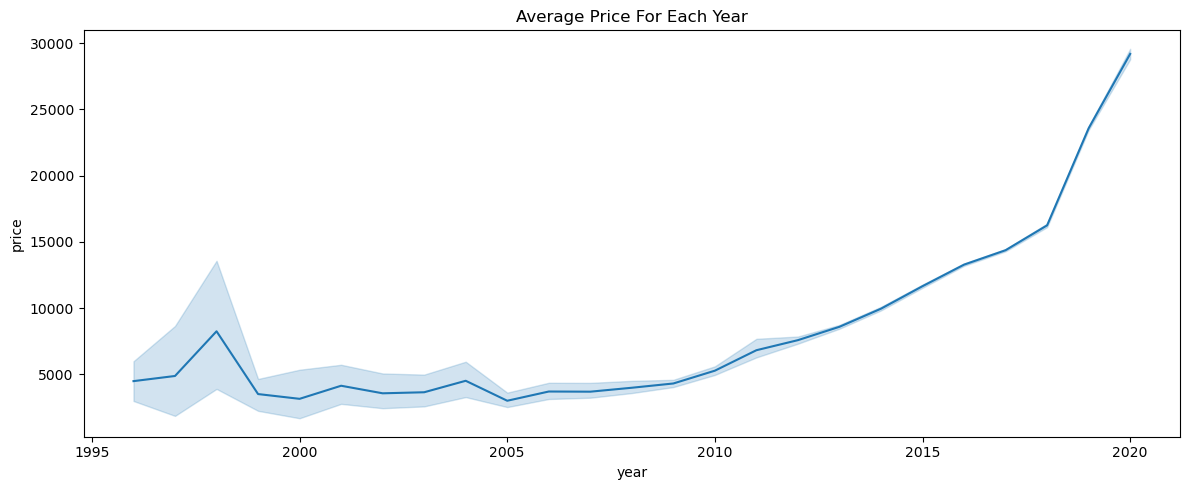

In [54]:
plt.figure(figsize=(12,5))
sb.lineplot(data=merged_df,x='year',y='price')
plt.title('Average Price For Each Year')
plt.tight_layout()
plt.show()

* Terlihat adanya tren yang jelas dimana semakin baru suatu mobil bekas semakin tinggi juga harganya.Ini memang benar, karena mobil merupakan salah satu barang yang akan mengalami depresiasi seiring bertambahnya umur.https://caredge.com/depreciation
* Mobil yang semakin baru tentunya memiliki teknologi dan fitur-fitur lebih maju dan lengkap yang tentunya menambahkan value mobil tersebut.
* Meski demikian, kita bisa melihat pada data kita mobil tua bukan merupakan mobil dengan harga termurah bahkan memiliki harga yang hampir seimbang dengan mobil tahun 2010.Ini kemungkinan besar terjadi karena banyak faktor seperti nilai historis,keunikan model, limited model, dan tentunya demand https://americancollectors.com/articles/vintage-vs-classic-vs-antique-cars/ . Namun mobil tua belum tentu akan memiliki harga yang tinggi, ini kembali lagi pada merek model dan kondisi mobilnya. Bisa dilihat pada grafik di bawah.(Insight ini membutuhkan lebih banyak data pada mobil tua agar valid)

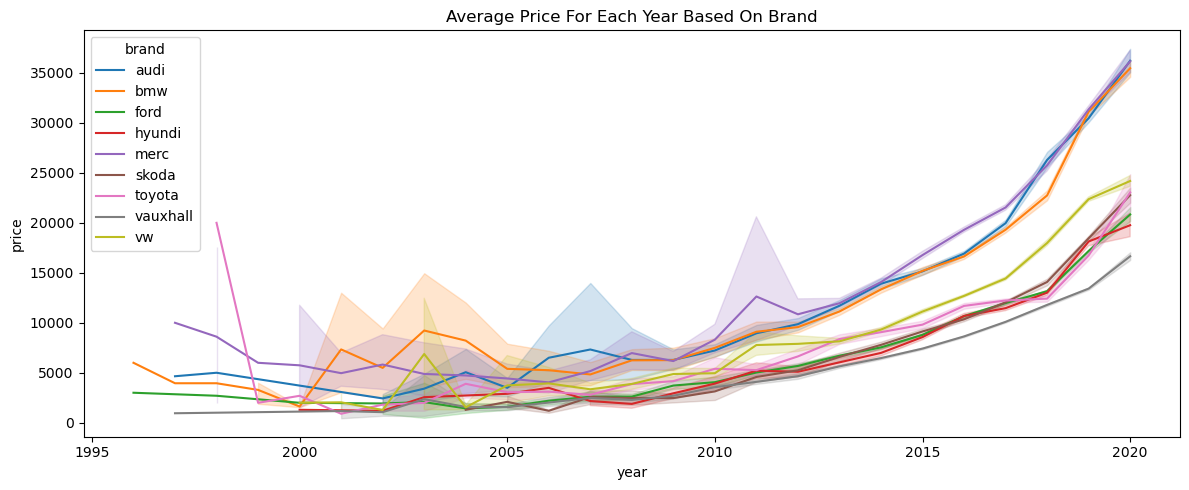

In [55]:
plt.figure(figsize=(12,5))
sb.lineplot(data=merged_df,x='year',y='price',hue='brand')
plt.title('Average Price For Each Year Based On Brand')
plt.tight_layout()
plt.show()

* Disini terlihat jelas harga mobil classic bergantung pada merknya juga, dimana merk vauxhall cenderung memiliki harga lebih murah seiring bertambahnya usia.Sebaliknya untuk merk lainnya masih terbilang fluktuatif karena pengaruh jenis modelnya juga, namun untuk mercedes terlihat ada peningkatan harga dari tahun 2006 ke bawah meskipun tren peningkatan ini tidak kuat.

#### Jenis Mobil

##### Brand

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


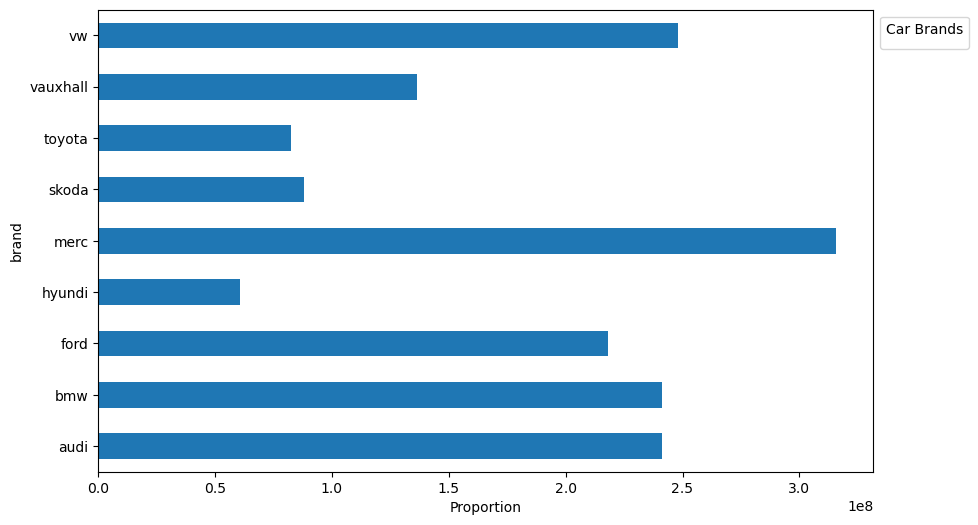

In [56]:
ct=pd.crosstab(merged_df['year'],merged_df['brand'],values=merged_df['price'],aggfunc='sum').sort_index()
ct_total=ct.sum(axis=0)
# ct_pct=ct.divide(ct_total,axis=0)
ax = ct_total.plot(kind='barh', stacked=True, figsize=(10, 6))
ax.set_xlabel('Proportion')
plt.legend(title='Car Brands', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

* Sebesar 18% dari keseluruhan data listing mobil bekas merupakan produk dari merek Ford.
* Proporsi tiap brand sepertinya bergantung pada popularitas masing-masing merek di UK https://www.best-selling-cars.com/britain-uk/2015-full-year-britain-best-selling-car-brands/. Semakin banyak pengguna merek tertentu maka semakin banyak juga data yang tersedia untuk brand tersebut.

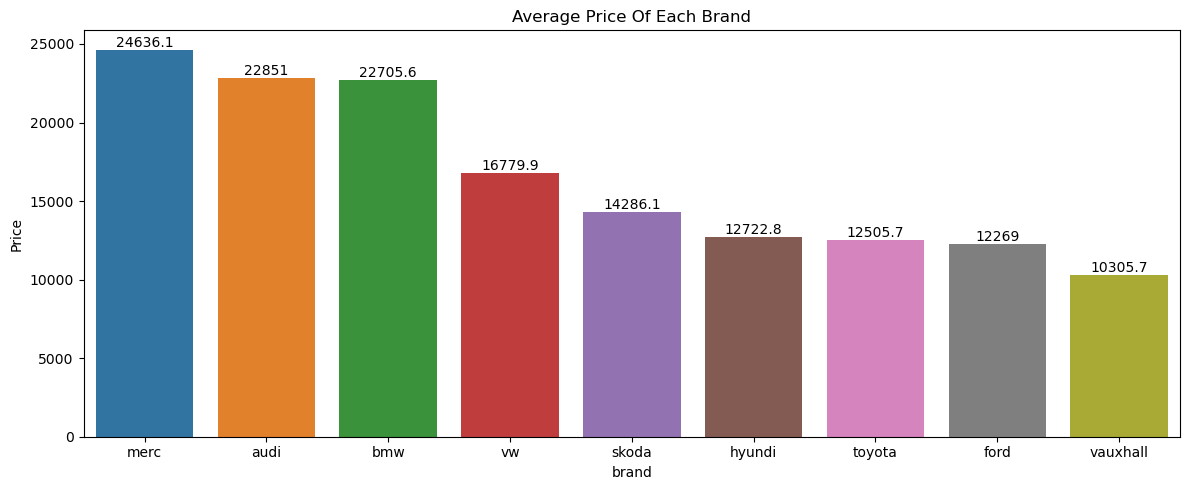

In [57]:
brand_mean = merged_df.groupby('brand',as_index=False)['price'].mean().sort_values('price',ascending=False)
plt.figure(figsize=(12,5))
brand_bar_2=sb.barplot(data=brand_mean,x='brand',y='price',errwidth=0)
for bar in brand_bar_2.containers:
    brand_bar_2.bar_label(bar)
plt.title('Average Price Of Each Brand')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

* Terlihat jelas disini terdapat perbedaan harga yang jelas pada brand mobil, dimana mobil bekas merek mercedes memiliki rata-rata harga paling tinggi dibanding mobil lain, diikuti oleh merk bmw dan audi yang hampir memiliki rata-rata harga yang sama.Sedangkan untuk merek mobil bekas dengan harga rata-rata terendah adalah merek vauxhall.Terlihat ketimpangan harga yang cukup signifikan setelah merek mobil bmw dengan selisih mencapai 6000 poundsterling dibanding merek vw pada peringkat ke 4.
* Seperti yang kita ketahui mercedes, bmw, dan audi merupakan golongan mobil yang mewah, jadi wajar jika memiliki harga tertinggi.

##### Transmission

Text(0.5, 1.0, 'Average Price for Transmission Type')

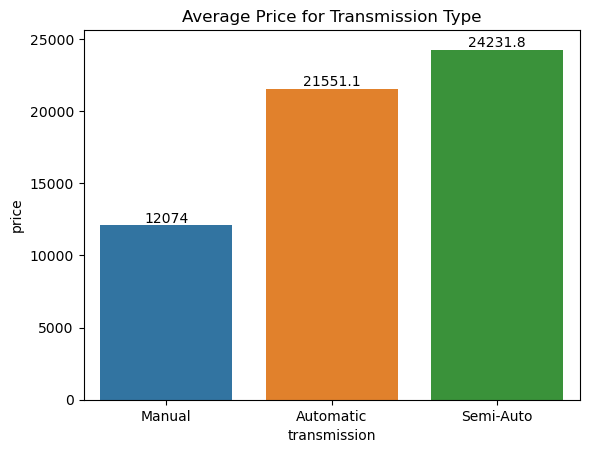

In [58]:
trans_mean=sb.barplot(data=merged_df,x='transmission',y='price',errwidth=0)
for bar in trans_mean.containers:
    trans_mean.bar_label(bar)

plt.title('Average Price for Transmission Type')

* Terlihat transmisi dengan rata-rata harga tertinggi adalah semi-auto diikuti oleh automatic, dan manual memiliki harga rata-rata termurah.Pada umumnya mobil automatic memang lebih mahal daripada manual. https://www.rac.co.uk/drive/advice/know-how/automatic-vs-manual-cars-which-is-better/

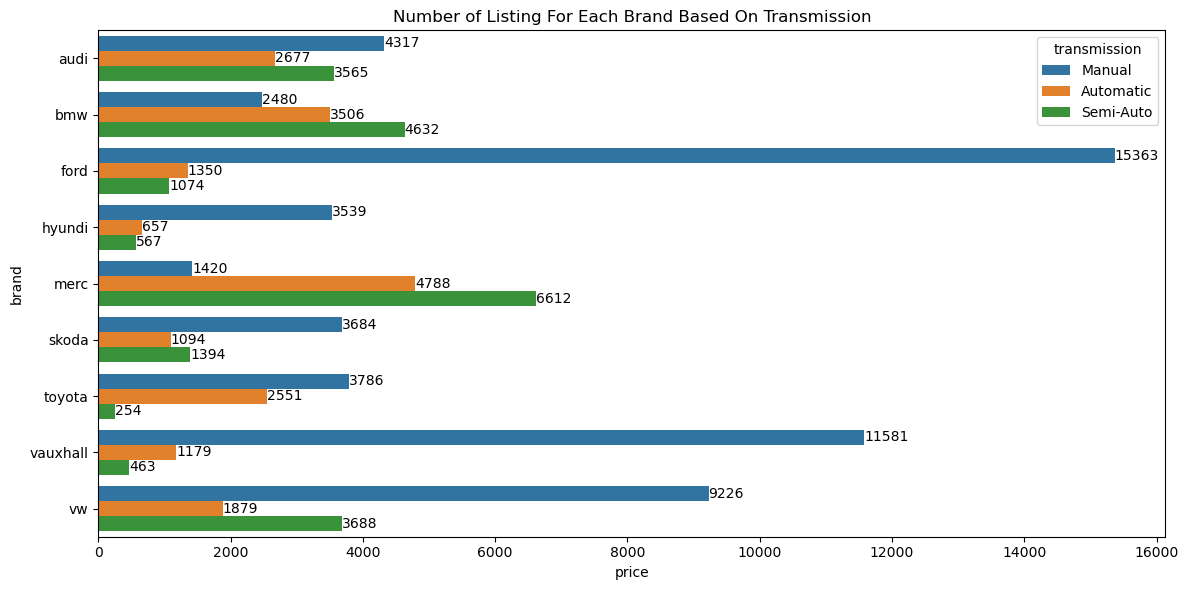

In [59]:
plt.figure(figsize=(12,6))
brand_trans = sb.barplot(data=merged_df,x='price',y='brand',hue='transmission',estimator=len,errwidth=0)
for bar in brand_trans.containers:
    brand_trans.bar_label(bar)
plt.title('Number of Listing For Each Brand Based On Transmission')
plt.tight_layout()
plt.show()

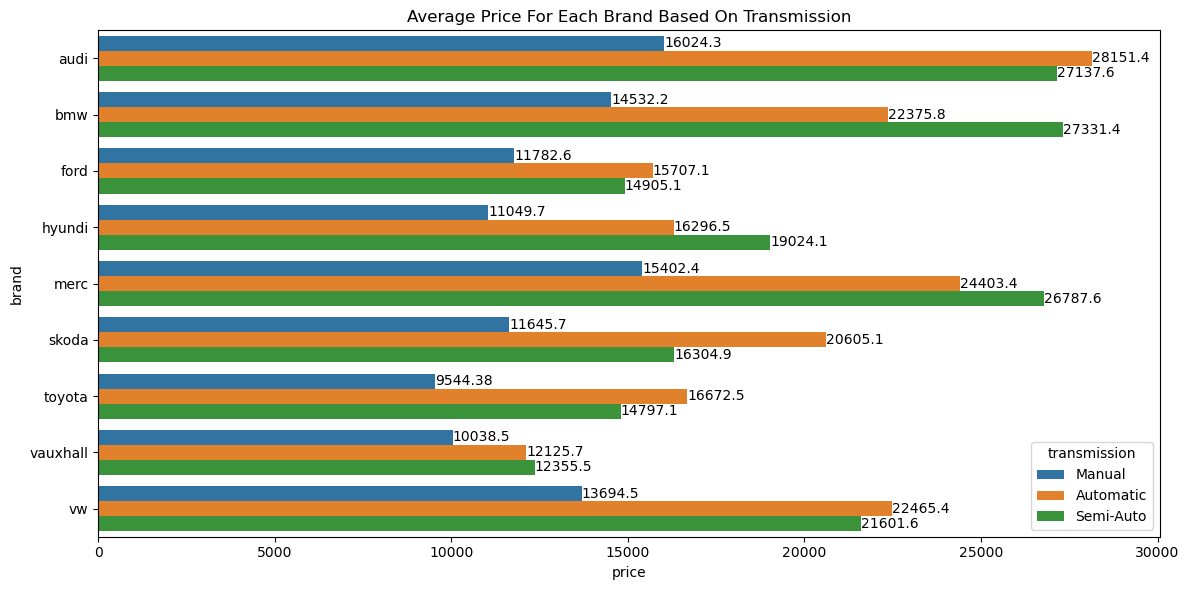

In [60]:
plt.figure(figsize=(12,6))
brand_trans = sb.barplot(data=merged_df,x='price',y='brand',hue='transmission',errwidth=0)
for bar in brand_trans.containers:
    brand_trans.bar_label(bar)
plt.title('Average Price For Each Brand Based On Transmission')
plt.tight_layout()
plt.show()

* Setelah ditelusuri lebih lanjut ternyata hampir pada semua brand, mobil dengan transmisi automatic atau semi-automatic menduduki top 2 dengan harga rata tertinggi.
* Sedangkan mobil dengan transmisi manual memiliki harga terendah pada semua brand.

##### Fuel Type

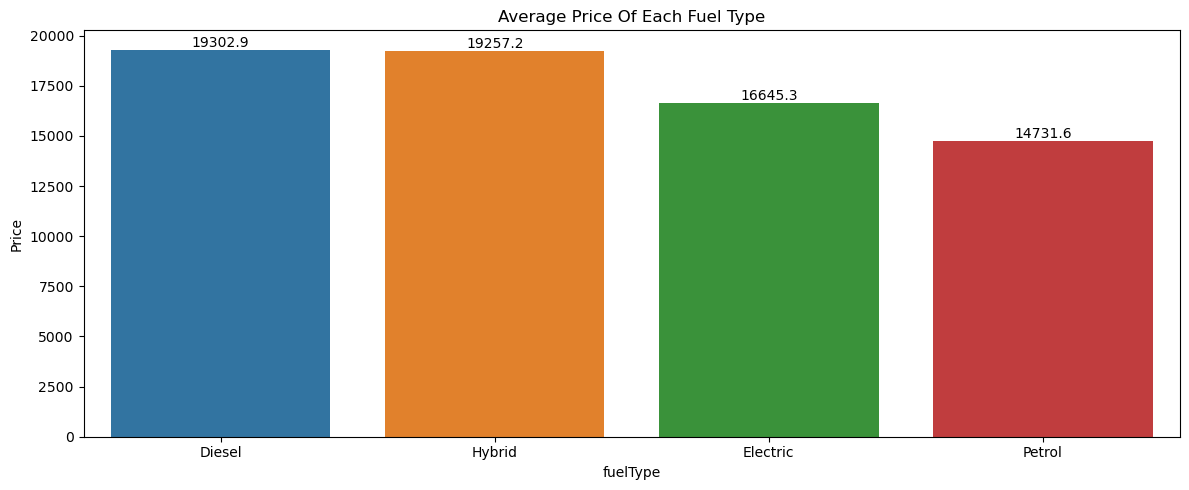

In [61]:
fuel_mean = merged_df.groupby('fuelType',as_index=False)['price'].mean().sort_values('price',ascending=False)
plt.figure(figsize=(12,5))
fuel_bar_1=sb.barplot(data=fuel_mean,x='fuelType',y='price',errwidth=0)
for bar in fuel_bar_1.containers:
    fuel_bar_1.bar_label(bar)
plt.title('Average Price Of Each Fuel Type')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

* Rata-rata harga mobil bekas tertinggi adalah mobil diesel diikuti mobil hybrid dengan rata-rata yang hampir sama, pada umumnya seharusnya mobil elektrik lebih mahal dari mobil jenis lainnya.Bahkan menurut https://thehill.com/policy/3607123-heres-why-many-electric-vehicles-are-so-expensive/#:~:text=Consumer%20Reports%C2%A0found%20in%202020%C2%A0that%20electric%20vehicles%20can%20cost%20between%2010%20and%2040%20percent%20more%20than%20other%2C%20similar%20vehicles. harga mobil EV bisa lebih tinggi 10-40% dari harga mobil lainnya.Maka dari itu kita akan telusuri lebih lanjut.


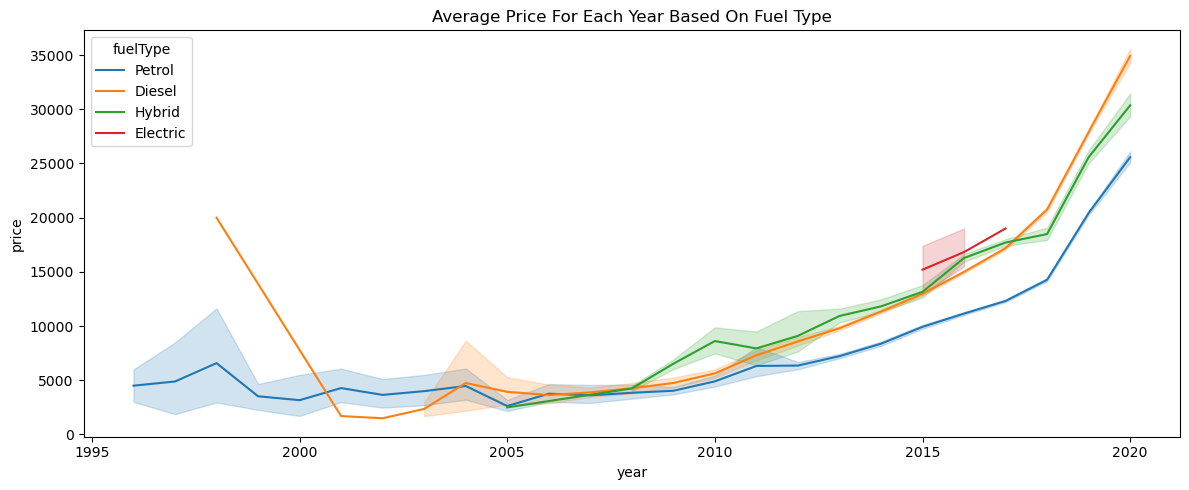

In [62]:
plt.figure(figsize=(12,5))
sb.lineplot(data=merged_df,x='year',y='price',hue='fuelType')
plt.title('Average Price For Each Year Based On Fuel Type')
plt.tight_layout()
plt.show()

* Ternyata data untuk mobil elektrik hanya mencapai tahun 2017 saja, dan belum tersedia data mengenai mobil elektrik yang lebih baru.Sedangkan sebelumnya kita telah mengetahui dimana mobil yang lebih baru pada umumnya semakin tinggi harganya.Bahkan di sini kita bisa melihat tren kenaikan harga yang paling signifikan pada seluruh type adalah pada tahun 2017 ke atas.Inilah alasan kenapa mobil electric bukan mobil termahal pada dataset kita.

#### Mileage

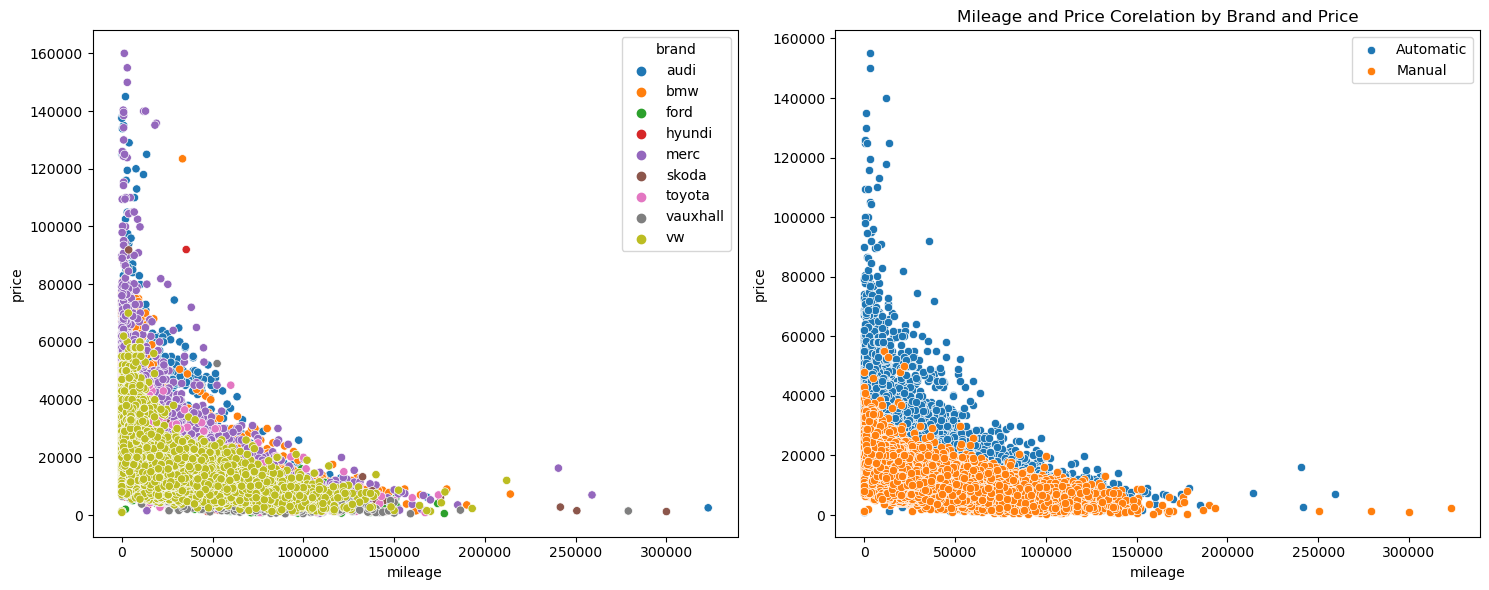

In [63]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
sb.scatterplot(data=merged_df,x='mileage',y='price',hue='brand',ax=ax[0])
sb.scatterplot(data=merged_df[merged_df['transmission']=='Automatic'],x='mileage',y='price',label='Automatic',ax=ax[1])
sb.scatterplot(data=merged_df[merged_df['transmission']=='Manual'],x='mileage',y='price',label='Manual',ax=ax[1])
plt.title('Mileage and Price Corelation by Brand and Price')


plt.tight_layout()
plt.show()

* Di sini terlihat adanya korelasi negatif dimana seiring bertambahnya mileage mobil maka semakin rendah harga mobil tersebut.Fenomena ini terjadi pada seluruh brand tanpa kecuali.
* Demikian pula jika dibandingkan berdasarkan jenis transmisi. baik mobil manual maupun jenis transmisi lainnya mengalami penurunan price seiring bertambahnya mileage

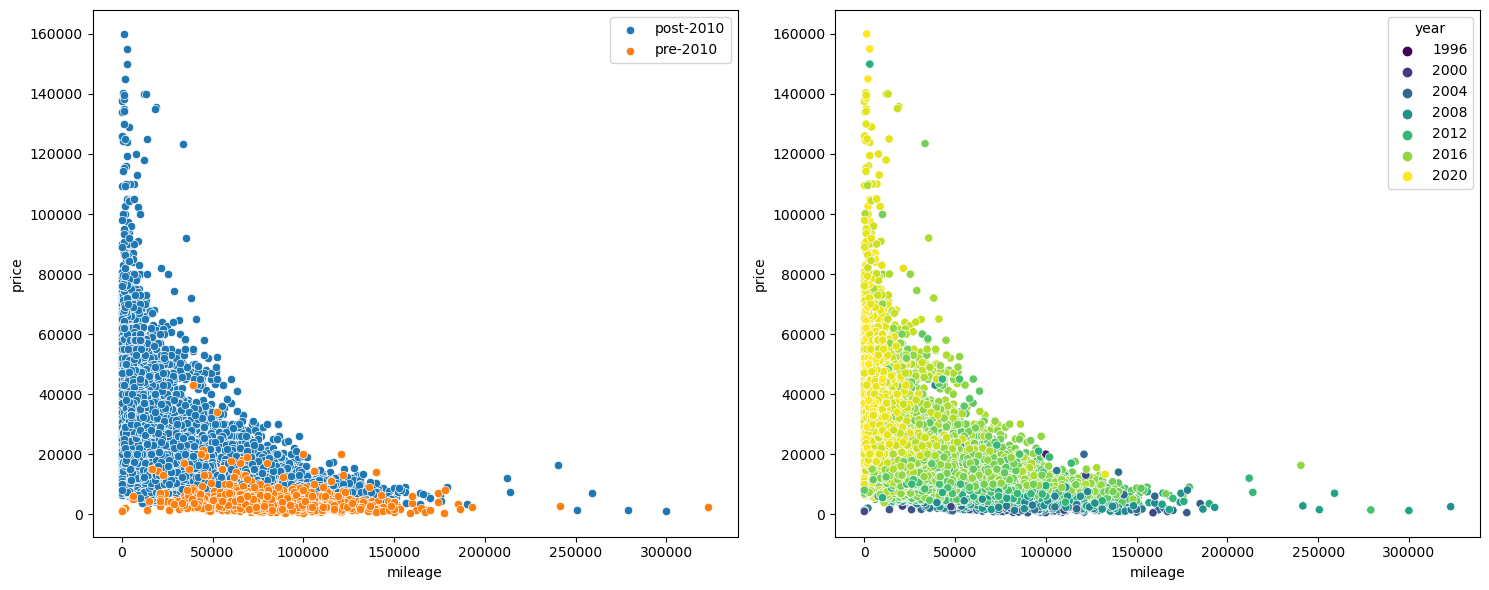

In [64]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
sb.scatterplot(data=merged_df,x='mileage',y='price',hue='year',ax=ax[1],palette=sb.color_palette('viridis',as_cmap=True))
sb.scatterplot(data=merged_df[merged_df['year']>=2010],x='mileage',y='price',label='post-2010',ax=ax[0])
sb.scatterplot(data=merged_df[merged_df['year']<2010],x='mileage',y='price',label='pre-2010',ax=ax[0])

plt.tight_layout()
plt.show()

#### Miles per  Gallon

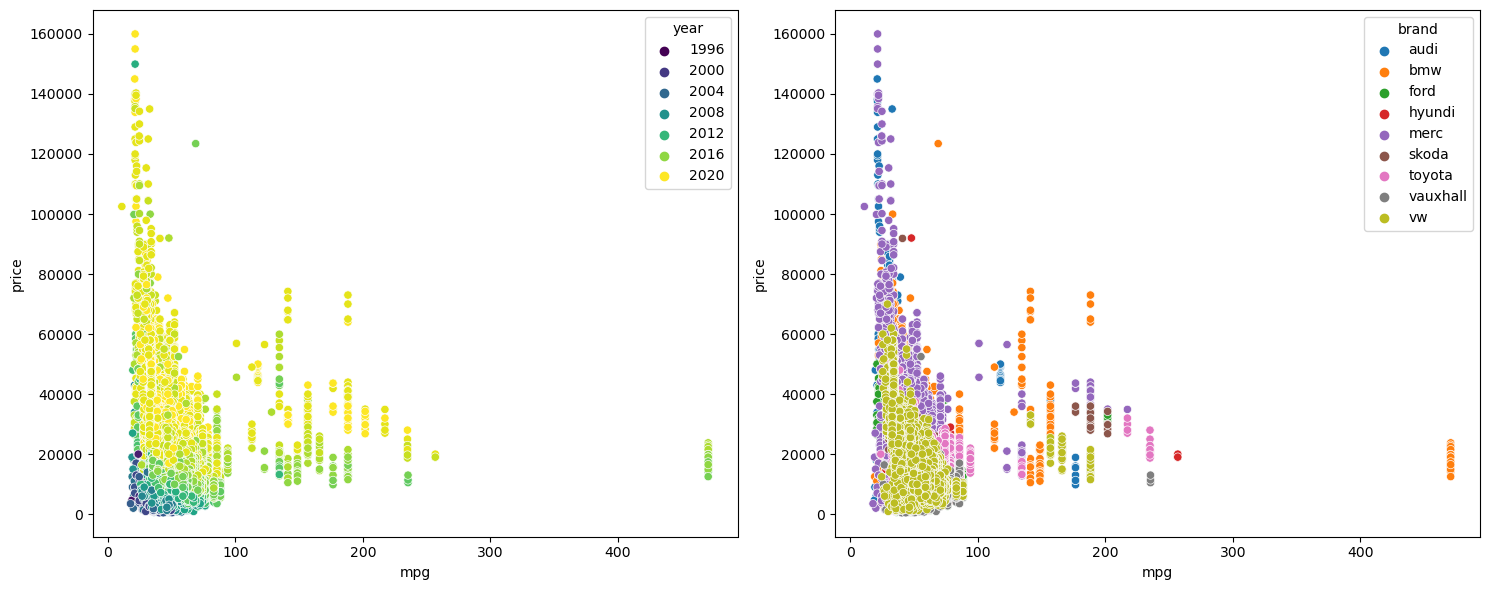

In [66]:
fig,ax=plt.subplots(1,2,figsize=(15,6))

sb.scatterplot(data=merged_df,x='mpg',y='price',hue='year',ax=ax[0],palette=sb.color_palette('viridis',as_cmap=True))
sb.scatterplot(data=merged_df,x='mpg',y='price',hue='brand',ax=ax[1])


# sb.scatterplot(data=merged_df[merged_df['year']<=2005],x='mpg',y='price',label='Pra 2010')
# sb.scatterplot(data=merged_df[(merged_df['year']>2005)&(merged_df['year']<=2018)],x='mpg',y='price',label='2010-2018')
# sb.scatterplot(data=merged_df[merged_df['year']>2018],x='mpg',y='price',label='pasca 2018')

plt.tight_layout()
plt.show()

* Sepertinya terdapat korelasi negatif antara mpg dan price dimana semakin besar mpg atau semakin irit sebuah mobil, harganya semakin murah.
* Untuk mobil dengan mpg kecil namun murah ini disebabkan oleh umur mobil yang memang sudah tua, sebaliknya untuk mobil yang masih termasuk baru dan dengan mpg kecil harganya cenderung tinggi.Ini memang wajar mengingat mobil mewah seperti sports car memang memiliki mpg kecil alias boros.
* Di sini juga terlihat masih cukup banyak mobil baru dengan mpg kecil namun memiliki harga yang hampir sama dengan mobil dengan mpg jauh lebih besar
* Kita menemukan ternyata mobil baru dengan mpg kecil yang lebih murah cenderung berasal dari merek yang tergolong murah yaitu vw dan ford.Dan mpg kecil yang harganya mahal mayoritas keluaran audi dan mercedes. 
* Namun terdapat pula mobil dari merek audi dan mercedes dengan harga rendah dan mpg kecil. Kelompok ini umumnya berusia lebih tua, sehingga telah mengalami penurunan efisiensi.

#### Engine Size

<Axes: xlabel='engineSize', ylabel='price'>

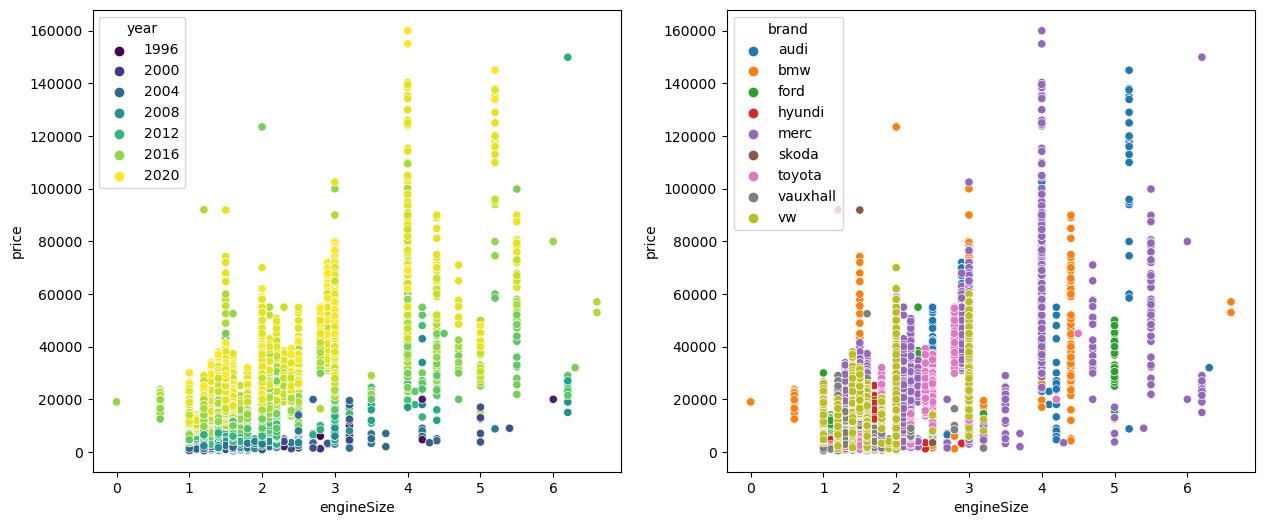

In [67]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
sb.scatterplot(data=merged_df,x='engineSize',y='price',hue='year',ax=ax[0],palette=sb.color_palette('viridis',as_cmap=True))
# sb.scatterplot(data=merged_df[merged_df['year']>=2008],x='engineSize',y='price',label='post-2008',ax=ax[0])
# sb.scatterplot(data=merged_df[merged_df['year']<2008],x='engineSize',y='price',label='pre-2008',ax=ax[0])

sb.scatterplot(data=merged_df,x='engineSize',y='price',hue='brand',ax=ax[1])

* Di sini terdapat korelasi positif antara engine size dan price, terutama pada mobil yang lebih baru.Sedangkan untuk mobil tua korelasinya sepertinya cenderung sangat lemah.
* Berdasar https://www.carwow.co.uk/guides/choosing/what-engine-size-do-i-need-0521#gref engine size di atas 3.0l biasanya merupakan mobil yang terbilang mewah.
* Meskipun engine size sebesar 5l, harga mobil ford masih jauh di bawah harga mobil merk mahal seperti mercedes, bmw, dan audi.
* Merk mercedes, bmw, dan audi dengan engine size yang tinggi dengan harga murah merupakan mobil tua.

* Dari beberapa insight diatas, kita bisa melihat besarnya pengaruh brand mobil terhadap harganya.

In [74]:
merged_df.to_csv('used_car_process.csv',index=True)



In [76]:
merged_df=pd.read_csv('used_car_process.csv')
merged_df.set_index('Unnamed: 0',inplace=True)
merged_df

,model,year,price,transmission,mileage,fuelType,mpg,engineSize,brand
Unnamed: 0,,,,,,,,,
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...
99178,Eos,2012,5990,Manual,74000,Diesel,58.9,2.0,vw
99179,Fox,2008,1799,Manual,88102,Petrol,46.3,1.2,vw
99180,Fox,2009,1590,Manual,70000,Petrol,42.0,1.4,vw


### Correlation

In [71]:
numeric_col=list([col for col in merged_df.columns if merged_df[col].dtypes!='object'])

In [72]:
kruskal_test('price')

Menolak H0. untuk setiap value model unik terdapat perbedaan price signifikan 
Menolak H0. untuk setiap value transmission unik terdapat perbedaan price signifikan 
Menolak H0. untuk setiap value fuelType unik terdapat perbedaan price signifikan 
Menolak H0. untuk setiap value brand unik terdapat perbedaan price signifikan 


* Dari hasil uji kruskal, setiap kelompok pada tiap variabel independen memiliki perbedaan price yang signifikan.

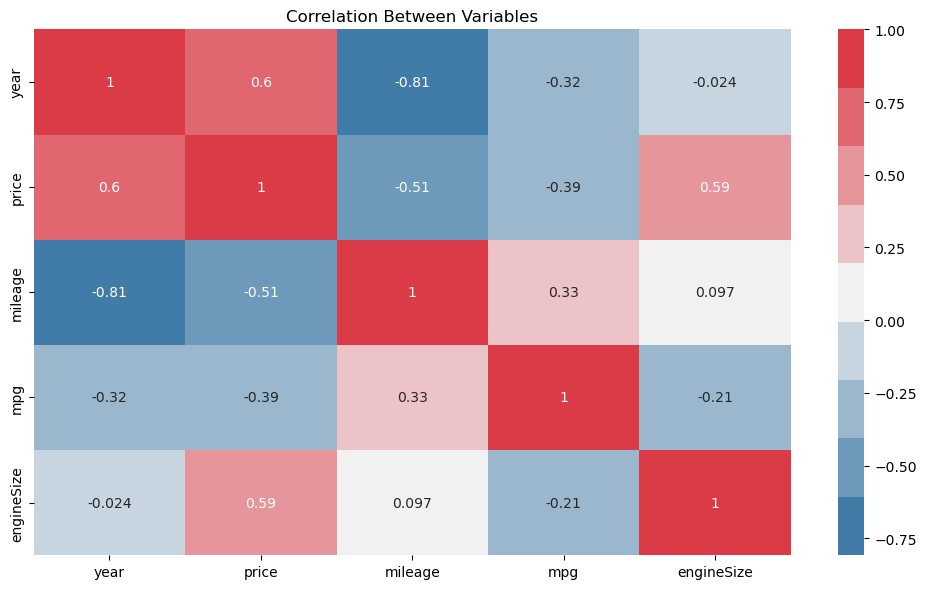

In [77]:

plt.figure(figsize=(10,6))
sb.heatmap(merged_df[numeric_col].corr(method='spearman'),annot=True,cmap=sb.diverging_palette(240, 10, n=9))
plt.title('Correlation Between Variables')
plt.tight_layout()
plt.show()

* Berdasarkan https://www.statstutor.ac.uk/resources/uploaded/spearmans.pdf untuk menghitung korelasi antara variabel yang tidak berdistribusi normal sebaiknya menggunakan spearman, karena pada pearson data diasumsikan berdistribusi normal pada kedua variabelnya. Kemudian pearson lebih pada menghitung kekuatan hubungan linear antara kedua variabel, sedangkan spearman menghitung kekuatan hubungan monotonic function dimana hubungan tidak selalu linear namun selalu naik selama variabel independennya naik atau selalu turun jika variabel independennya turun.
* Berdasarkan threshold dari referensi tersebut:
    * 0-0.19==>sangat lemah
    * 0.20-0.39==>lemah
    * 0.40-.059==>sedang
    * 0.60-0.79==>kuat
    * 0.80-1.0==>sangat kuat

* Kolom year memiliki korelasi positif yang kuat terhadap price.
* Kolom mileage memiliki korelasi negatif yang sedang tidak kuat dan tidak lemah terhadap price.
* Kolom mpg memiliki korelasi negatif yang lemah terhadap price.
* Kolom enginesize memiliki korelasi sedang positif namun hampir mencapai korelasi yang kuat terhadap price.
* Pada kolom year dan mileage terlihat adanya korelasi negatif yang sangat kuat sehingga adanya kemungkinan multicollinearity.

Korelasi positif berarti semakin besar variabel independen maka semakin besar juga pricenya.

## **Modeling**

In [78]:
X=merged_df.drop(columns=['price'])
y=merged_df.price

In [79]:
X_trainval, X_test, y_trainval, y_test=train_test_split(
    X, y,
    test_size=0.2,random_state=2020
)

In [94]:
robust_sc=RobustScaler()
robust_sc_var=['year','mileage','mpg']

onehot_enc=OneHotEncoder(drop='first')
onehot_var=['transmission','brand','fuelType']

binary_enc=ce.BinaryEncoder()
binary_var=['model']


transformer=ColumnTransformer([
    ('onehot',onehot_enc,onehot_var),
    ('binary_encoding',binary_enc,binary_var),
    ('minmax_sc',robust_sc,robust_sc_var),

],remainder='passthrough')




In [83]:
X_trainval_transformed=transformer.fit_transform(X_trainval)
X_test_transformed=transformer.transform(X_test)

### Baseline regression

In [84]:
import time
def compare_models_trainval(model_group,model_name,pipe=False):
    duration=[]
    score_r2=[]
    score_mdae=[]

    kfold=KFold(n_splits=10,random_state=42,shuffle=True)

    for m_base in model_group:
        if pipe==False:
            m=Pipeline([
                ('feature_scaling', transformer),
                ('modelling', m_base)
            ])
        else:
            m=m_base
        m_start_time=time.time()
        
        score_r2.append(cross_val_score(m,X_trainval,y_trainval,scoring='r2',cv=kfold).mean())
        score_mdae.append(abs(cross_val_score(m,X_trainval,y_trainval,scoring='neg_median_absolute_error',cv=kfold).mean()))

        m_time=time.time()-m_start_time 
        duration.append(m_time)
    summary=pd.DataFrame({
        'Nama Model': model_name,
        'Durasi':duration,
        'MedAE':score_mdae,
        'R-squared':score_r2
    })
    return summary 
           





In [90]:
from sklearn.metrics import r2_score
def compare_models_test(model_group,model_name,pipe=False):

    duration=[]
    score_r2=[]
    score_mdae=[]

    kfold=KFold(n_splits=10,random_state=42,shuffle=True)

    for m_base in model_group:
        if pipe==False:
            m=Pipeline([
                ('feature_scaling', transformer),
                ('modelling', m_base)
            ])
        else:
            m=m_base
        m_start_time=time.time()
        m.fit(X_trainval,y_trainval)
        y_test_pred=m.predict(X_test)
        

        score_r2.append(r2_score(y_test,y_test_pred))
        score_mdae.append(median_absolute_error(y_test, y_test_pred))


        m_time=time.time()-m_start_time 
        duration.append(m_time)
    print(model_name,duration,score_mdae,score_r2)
    summary=pd.DataFrame({
        'Nama Model': model_name,
        'Durasi':duration,
        'MedAE':score_mdae,
        'R-squared':score_r2
    })
    return summary 
           



In [91]:
base_xgb2=XGBRegressor(random_state=42)
# base_knn2=KNeighborsRegressor(n_neighbors=5,random_state=42)
# base_dt2=DecisionTreeRegressor(max_depth=15,random_state=42)
base_knn2=KNeighborsRegressor()
base_dt2=DecisionTreeRegressor(random_state=42)


models=[base_xgb2,base_knn2,base_dt2]
# model_names=['XGB Regressor','KNeighbors Regressor (neighbors=5)','DecisionTree Regressor (max_depth=17)','Linear Regression']
model_names=['XGB Regressor','KNeighbors Regressor','DecisionTree Regressor']



# compare_models_trainval(models,model_names)

In [95]:
compare_models_test(models,model_names)

['XGB Regressor', 'KNeighbors Regressor', 'DecisionTree Regressor'] [0.42228102684020996, 1.683168649673462, 0.4829142093658447] [845.812255859375, 771.5000000000009, 948.5] [0.9607752451585082, 0.9529767812828579, 0.9347119230383928]


,Nama Model,Durasi,MedAE,R-squared
0,XGB Regressor,0.422281,845.812256,0.960775
1,KNeighbors Regressor,1.683169,771.500000,0.952977
2,DecisionTree Regressor,0.482914,948.500000,0.934712


### Hyperparameter Tuning

In [96]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


In [99]:
base_knn2=KNeighborsRegressor(n_neighbors=5)
pipe_knn2=Pipeline([
    ('preprocess',transformer),
    ('model',base_knn2) # isi dulu dengan default
])
skfold=KFold(n_splits=10,random_state=42,shuffle=True)

from scipy.stats import uniform, randint


params = {
    "model__n_neighbors": list(np.arange(1,20,2)),
  
    }

search = GridSearchCV(pipe_knn2, 
                            scoring='neg_median_absolute_error', 
                            param_grid=params, 
                            cv=skfold, n_jobs=1, 
                            return_train_score=True)

search.fit(X_trainval, y_trainval)

report_best_scores(search.cv_results_, 1)

Model with rank: 1
Mean validation score: -768.160 (std: 11.826)
Parameters: {'model__n_neighbors': 5}



In [100]:
tune_knn2=KNeighborsRegressor(n_neighbors=7)

models=[tune_knn2]
# model_names=['XGB Regressor','KNeighbors Regressor (neighbors=5)','DecisionTree Regressor (max_depth=17)','Linear Regression']
model_names=['KNeighbors Regressor (k=5)']


compare_models_test(models,model_names)


['KNeighbors Regressor (k=5)'] [1.641892910003662] [773.8571428571422] [0.9530831469472689]


,Nama Model,Durasi,MedAE,R-squared
0,KNeighbors Regressor (k=5),1.641893,773.857143,0.953083


#### XGB Regression

Menurut https://xgboost.readthedocs.io/en/stable/tutorials/param_tuning.html, dalam melakukan tuning, fokus utama adalah mencari keseimbangan antara bias dan variance. Model yang kompleks akan mengurangi bias pada data training, namun meningkatkan variance yang membuat model tidak reliable pada data testing. Sebaliknya terlalu sederhananya suatu model membuat model lebih bias dan terlalu umum.


* n_estimators: Jumlah tree dalam ensemble, umunya ditingkatkan sampai efeknya perbaikan errornya stagnan.
* max_depth: Kedalaman masing-masing tree. Semakin besar, semakin mendekati data training, namun lebih rawan overfit. berkisar antara 1 sampai 10
* eta: Koefisien yang mengatur kecepatan masing-masing tree beradaptasi. Biasanya diperkecil agar model lebih teliti, namun diimbangi dengan n_estimator yang lebih banyak.
* reg_alpha dan reg_lambda: Koefisien penalti untuk memperkecil pengaruh variabel yang berlebihan. Semakin besar, penalisasi akan lebih kuat.

Untuk mendapatkan parameter terbaik, dilakukan cross-validation dengan GridSearchCV. Pada setiap kombinasi parameter, model akan dilatih dengan 10 bagian berbeda dari dataset training, dan akan dilihat kombinasi parameter yang dapat menghasilkann MAE rata-rata terendah dan std yang paling stabil.

Setelah melakukan gridSearch, terdapat penurunan performa MAE model terbaik bila dibandingkan dengan XGB baseline. Parameter n_estimator, mac_depth terbaik yang cenderung besar menunjukkan model butuh peningkatan kompleksitas. Sementara itu, reg_alpha, reg_lambda yang mengecil serta eta yang cenderung bedar menunjukkan penalisasi fitur mungkin perlu diperlonggar.

In [101]:
base_xgb2=XGBRegressor(random_state=42)
pipe_xgb2=Pipeline([
    ('preprocess',transformer),
    ('model',base_xgb2) # isi dulu dengan default
])
skfold=KFold(n_splits=10,random_state=42,shuffle=True)

from scipy.stats import uniform, randint


params = {
    "model__n_estimators": [90,100,110],
    "model__max_depth": [20,21,22],
    "model__eta": [0.2,0.1,0.095],
    "model__reg_alpha": [20,30],
    "model__reg_lambda": [20,30],
    "model__gamma": [1,10,20],
    "model__colsample_bytree": [0.8,0.9,1],
    "model__subsample": [0.8,0.9,1],  
    "model__max_bin": [250,256],
  
    }

search = GridSearchCV(pipe_xgb2, 
                            scoring='neg_median_absolute_error', 
                            param_grid=params, 
                            cv=skfold, n_jobs=1, 
                            return_train_score=True)

search.fit(X_trainval, y_trainval)

report_best_scores(search.cv_results_, 1)

Terlihat model memiliki mean validation score yang membaik. Walaupun kompleksitas model bertambah, namun parameter reg_alpha yang berperan mealukukan penalisi variabel juga bertambah. Hal ini menunjukkan model yang sudah lebih seimbang pemenuhan bias dan variancenya. Kita lanjutkan ke pengujian pada gugus data testing

In [ ]:
tune_xgb2=search.best_estimator_

models=[tune_xgb2]
# model_names=['XGB Regressor','KNeighbors Regressor (neighbors=5)','DecisionTree Regressor (max_depth=17)','Linear Regression']
model_names=['XGB Regressor, Tuned']


compare_models_test(models,model_names,pipe=True)

,Nama Model,Durasi,MedAE,R-squared
0,"XGB Regressor, Tuned",13.177991,782.800195,0.943246


### Selected Model

In [ ]:
tune_xgb2

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['transmission', 'brand']),
                                                 ('binary_encoding',
                                                  BinaryEncoder(), ['model']),
                                                 ('minmax_sc', RobustScaler(),
                                                  ['year', 'mileage',
                                                   'mpg'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsampl...
                              eval_metric=None, feature_types=None, gamma=4,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=256, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=14, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=9, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [ ]:
tune_xgb2.fit(X_trainval,y_trainval)
y_pred_test=tune_xgb2.predict(X_test)

merged_test_predict=X_test.copy()
merged_test_predict['price_predict']=y_pred_test
merged_test_predict['price_test']=y_test


<Axes: xlabel='price_test', ylabel='price_predict'>

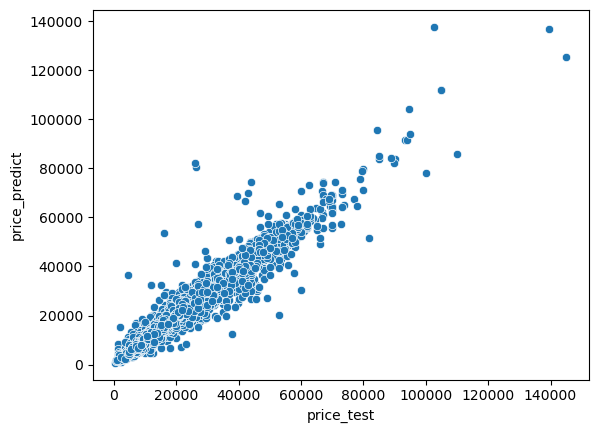

In [ ]:
sb.scatterplot(merged_test_predict,x='price_test',y='price_predict')


<Axes: xlabel='price_test', ylabel='price_predict'>

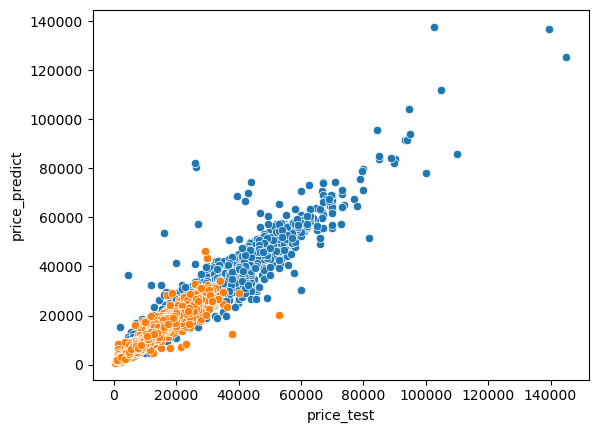

In [ ]:
sb.scatterplot(merged_test_predict[merged_test_predict['transmission']!='Manual'],x='price_test',y='price_predict')
sb.scatterplot(merged_test_predict[merged_test_predict['transmission']=='Manual'],x='price_test',y='price_predict')


Perbandingan pada hasil prediksi dengan data test hampir mendekati garis y=x, dengan pencilan yang relatif sedikit. Hanya satu data point yang diprediksi model jauh lebih murah daripada price sebenarnya.

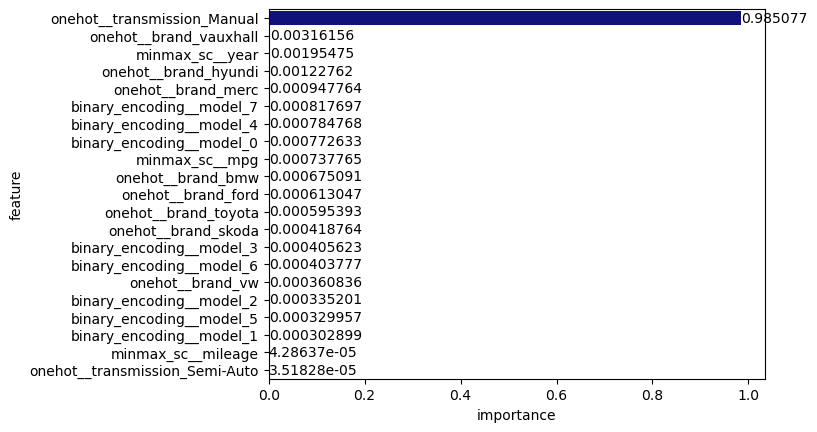

In [ ]:
fi_xgb=pd.DataFrame({
    'feature':tune_xgb2[0].get_feature_names_out(),
    'importance':tune_xgb2[1].feature_importances_
}).sort_values('importance',ascending=False)
fi_xgb_bar=sb.barplot(fi_xgb,y='feature',x='importance',color='darkblue')
for bar in fi_xgb_bar.containers:
    fi_xgb_bar.bar_label(bar)
# fi_xgb[fi_xgb['feature']!='onehot__transmission_Manual']

Feature onehot_transmission_Manual menjadi fitur paling berpengaruh dalam model XGB. Hal ini selaras dengan eksplorasi data, dahwa mobil bertransmisi manual memiliki kecenderungan lebih muraah. Fitur lainnya yang juga berpengaruh yaitu engineSize, year, dan brand. Terlihat juga bahwa masing-masing fitur yang mewakili brand dengan median harga tertinggi(merc dan vw) dan median harga terendah (toyota dan vauxhall) juga memiliki importance yang tinggi

###

* Kesimpulan dan Rekomendasi

* Implikasi

* 

Limitasi model:
- Model dilatih menggunakan dataset harga listing (belum terjual) yang ditentukan oleh tiap pemilik mobil, dimana hanya berdasarkan pertimbangan dan bias pada sisi penjual, sedangkan menurut kami model yang dihasilkan akan lebih baik lagi jika menggunakan dataset mobil bekas yang sudah terjual karena dengan harga yang sudah terjual tentunya merupakan harga yang bisa diterima oleh pihak penjual dan pembeli.Sedangkan jika menggunakan harga listing, masih ada kemungkinan besar harga yang tidak sesuai dan kadang harga yang tidak sesuai ini dapat diganti di masa depan jika mobil tersebut tidak laku-laku.
- Model juga kurang dapat dipercaya dalam memprediksi harga mobil di sekitar tahun 2010 ke bawah dan di atas tahun 2020 karena sedikitnya data untuk mobil di sekitar tahun 2010 ke bawah, dan dataset yang hanya sampai tahun 2020.
